# Exploratory Data Analysis for Default Credit Card Dataset

#### Problem Definition.

How does credit card work? <br>
- A credit card holder uses the card to make purchases, creating a credit usage amount of X during the billing cycle.

- At the end of the cycle, a bill is generated stating the total amount due (X), along with a minimum payment requirement.

- The cardholder pays Y amount toward the bill.

- The outstanding balance becomes (X-Y), which carries over to the next cycle and may incur interest.

- The holder uses more credit, X' amount, which is added to the outstanding balance, creating a new bill total of (X-Y)+X', plus any interest or fees if applicable.

How does a default occur? <br>
- The cardholder fails to make the minimum payment by the due date for multiple consecutive billing cycles (usually 90 to 180 days.)

- After a prolonged period of non-payment (often 90 days or more), the lender declares the account in default.

Description of the Data.
* LIMIT_BAL: Amount of given credit in NT dollars
* SEX: Gender (1 = male, 2 = female)
* EDUCATION: Education level
    
    1 = graduate school

    2 = university

    3 = high school

    4 = others

    5, 6 = unknown
* MARRIAGE: Marital status (1 = married, 2 = single, 3 = others)
* AGE: Age in years
* PAY_0 to PAY_6: Repayment status from September to April 2005
    
    -1 = pay duly

    1 = payment delay for one month

    2 = payment delay for two months

    ...

    8 = delay for eight months

    9 = delay for nine months and above

* BILL_AMT1 to BILL_AMT6: Amount of bill statement from  September to April 2005 (NT dollars)

* PAY_AMT1 to PAY_AMT6: Amount of previous payment from  September to April 2005 (NT dollars)

* Y: Default payment (1 = yes, 0 = no)

In [2]:
#Import packages.
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Exploration

In [3]:
df = pd.read_csv('default.csv')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,50000,1,2,1,46,0,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [5]:
df.shape

(30000, 24)

There are 30,000 rows and 24 columns.

In [6]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 35


We have 35 duplicate rows.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


### 

* Credit card limit mean is 167,484, and the standard deviation is 129,747, which is large.
* Most of the credit card holders are married or single.
* Average age is 35.5.
* Negative amount of bill statement means overpayment.
* Pay_0 - Pay_6 minimum value -2 indicates 'no consumption', -1: 'paid in full', 0: 'the use of revolving credit' according to Kaggle discussion forum.
* Y = 1 means default, Y = 0 means non-default. The mean is 0.22, indicating that there are 22% of credit cards that will default next month.


Categorical variabels; sex, education, and marriage. education and marriage have 0s.
What does this mean? Let's see the count for these undocumented labels.

Education: 
* 1 means graduate school
* 2 means university
* 3 means high school
* 4 means other and 0, 5, 6 are unknown --> we can combine 0, 4, 5, 6 into other.

Marriage: 
* 1 means married
* 2 means single
* 3 means other, and 0 is unknown -> we can combine 0 and 3 into other.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [9]:
# Count for each category in SEX
sex_counts = df['SEX'].value_counts()
print("Counts for SEX:")
print(sex_counts)

# Count for each category in EDUCATION
education_counts = df['EDUCATION'].value_counts()
print("\nCounts for EDUCATION:")
print(education_counts)

# Count for each category in MARRIAGE
marriage_counts = df['MARRIAGE'].value_counts()
print("\nCounts for MARRIAGE:")
print(marriage_counts)

Counts for SEX:
SEX
2    18112
1    11888
Name: count, dtype: int64

Counts for EDUCATION:
EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

Counts for MARRIAGE:
MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64


Summary: 30,000 rows, no null values, 35 dups, fix Education and Marriage for undocumented labels, rename Pay_0 with Pay_1 for consistency, (-2, -1, 0) values for pay_1.. pay_6 can be re-categorized as 'paid on time'.

### Data Cleaning

Let's remove dup values.

In [10]:
df = df.drop_duplicates()
print(f"Shape of dataframe after removing duplicates: {df.shape}")

Shape of dataframe after removing duplicates: (29965, 24)


Let's fix education & marriage.

In [11]:
df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], 4)

education_counts = df['EDUCATION'].value_counts()
print("\nCounts for EDUCATION:")
print(education_counts)



Counts for EDUCATION:
EDUCATION
2    14019
1    10563
3     4915
4      468
Name: count, dtype: int64


In [12]:
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)

marriage_counts = df['MARRIAGE'].value_counts()
print("\nCounts for MARRIAGE:")
print(marriage_counts)


Counts for MARRIAGE:
MARRIAGE
2    15945
1    13643
3      377
Name: count, dtype: int64


Let's rename Pay_0 to Pay_1 for consistency.

In [13]:
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)

Let's re-categorize (-2,-1,0) as 0 representing 'paid on time'.

In [14]:
def replace_to_zero(col):
    fil = (df[col] == -2) | (df[col] == -1) | (df[col] == 0)
    df.loc[fil, col] = 0

for i in ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    replace_to_zero(i)


### Explatory Data Analysis

#### 1. Default status

<Figure size 1000x600 with 0 Axes>

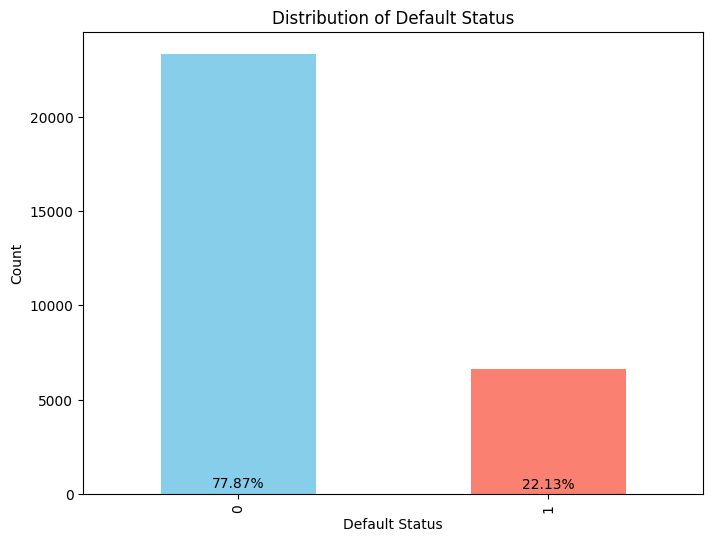

<Figure size 1000x600 with 0 Axes>

In [15]:
value_counts = df['Y'].value_counts()
total = value_counts.sum()
percentages = (value_counts / total) * 100

ax = value_counts.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'salmon'])
for i, count in enumerate(percentages):
    ax.text(i, count+100, f"{count:.2f}%", ha='center', va='bottom')

plt.title("Distribution of Default Status")
plt.xlabel("Default Status")
plt.ylabel("Count")
plt.figure(figsize=(10, 6))


---> Non default makes up almost 78%, and default for 22% - highly imbalanced data. Would be beneficial to perform SMOTE for minority oversampling purpose.

#### 2. Payment Status

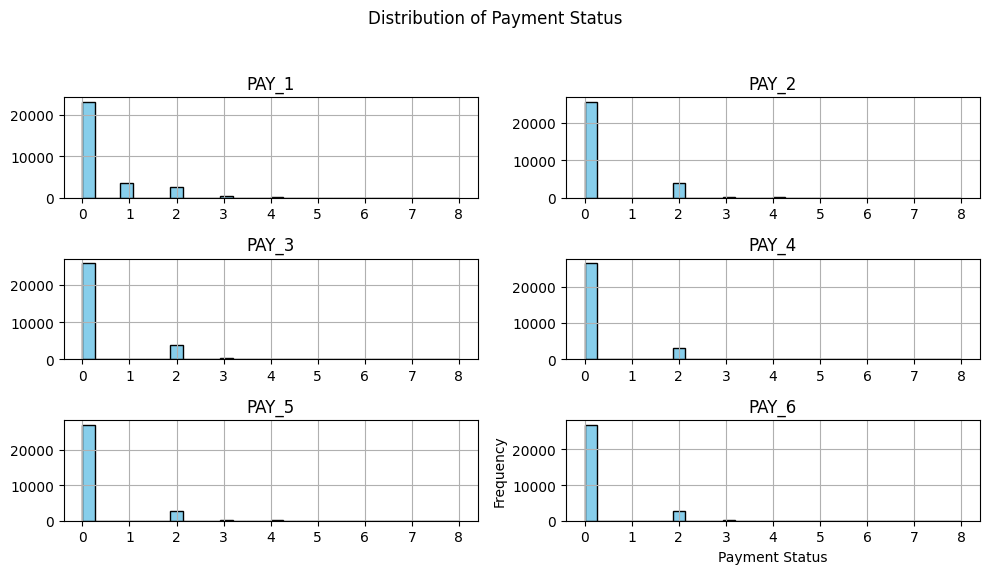

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [16]:
pay = df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
pay.hist(bins=30, figsize=(10, 6), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Payment Status")
plt.xlabel("Payment Status")
plt.ylabel("Frequency")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
plt.figure(figsize=(10, 6))

---> Majority of people pay duly, but there are some delay for 2 months or so.

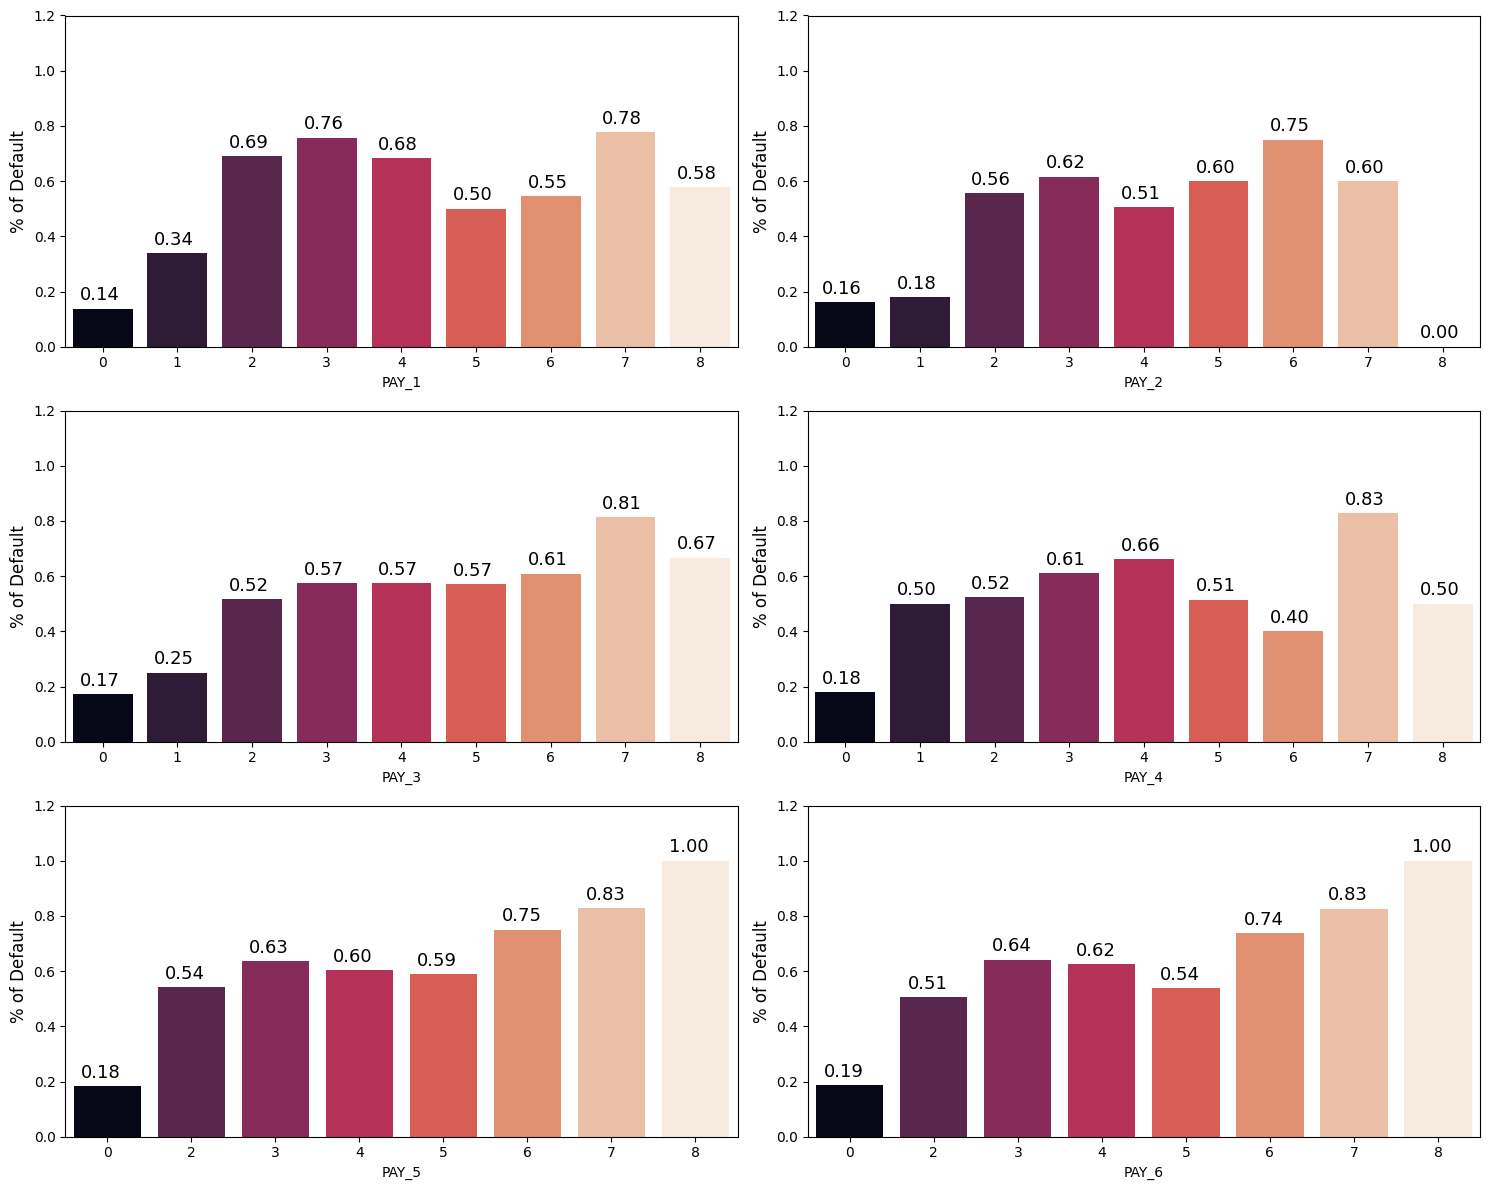

In [17]:
pay_x_fts = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "Y", data = df, palette = 'rocket',hue=col, legend =False, errorbar = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,1.2)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.09, p.get_height()+0.03),fontsize=13)

plt.show()

---> Above shows default % for each value for repayment status. Delaying for 2+ months likely to increase default %, as default % increased to 0.54 (54%).

In [18]:
pay_1_total_counts = df['PAY_1'].value_counts()
pay_1_default_counts = df[df['Y'] == 1]['PAY_1'].value_counts()
print(pay_1_total_counts)
print(pay_1_default_counts)

PAY_1
0    23169
1     3667
2     2666
3      322
4       76
5       26
8       19
6       11
7        9
Name: count, dtype: int64
PAY_1
0    3206
2    1843
1    1248
3     244
4      52
5      13
8      11
7       7
6       6
Name: count, dtype: int64


In [19]:
print(pay_1_default_counts[0]/pay_1_total_counts[0])

0.1383745522033752


#### 3. Bill amount.

In [20]:
bill_amt = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

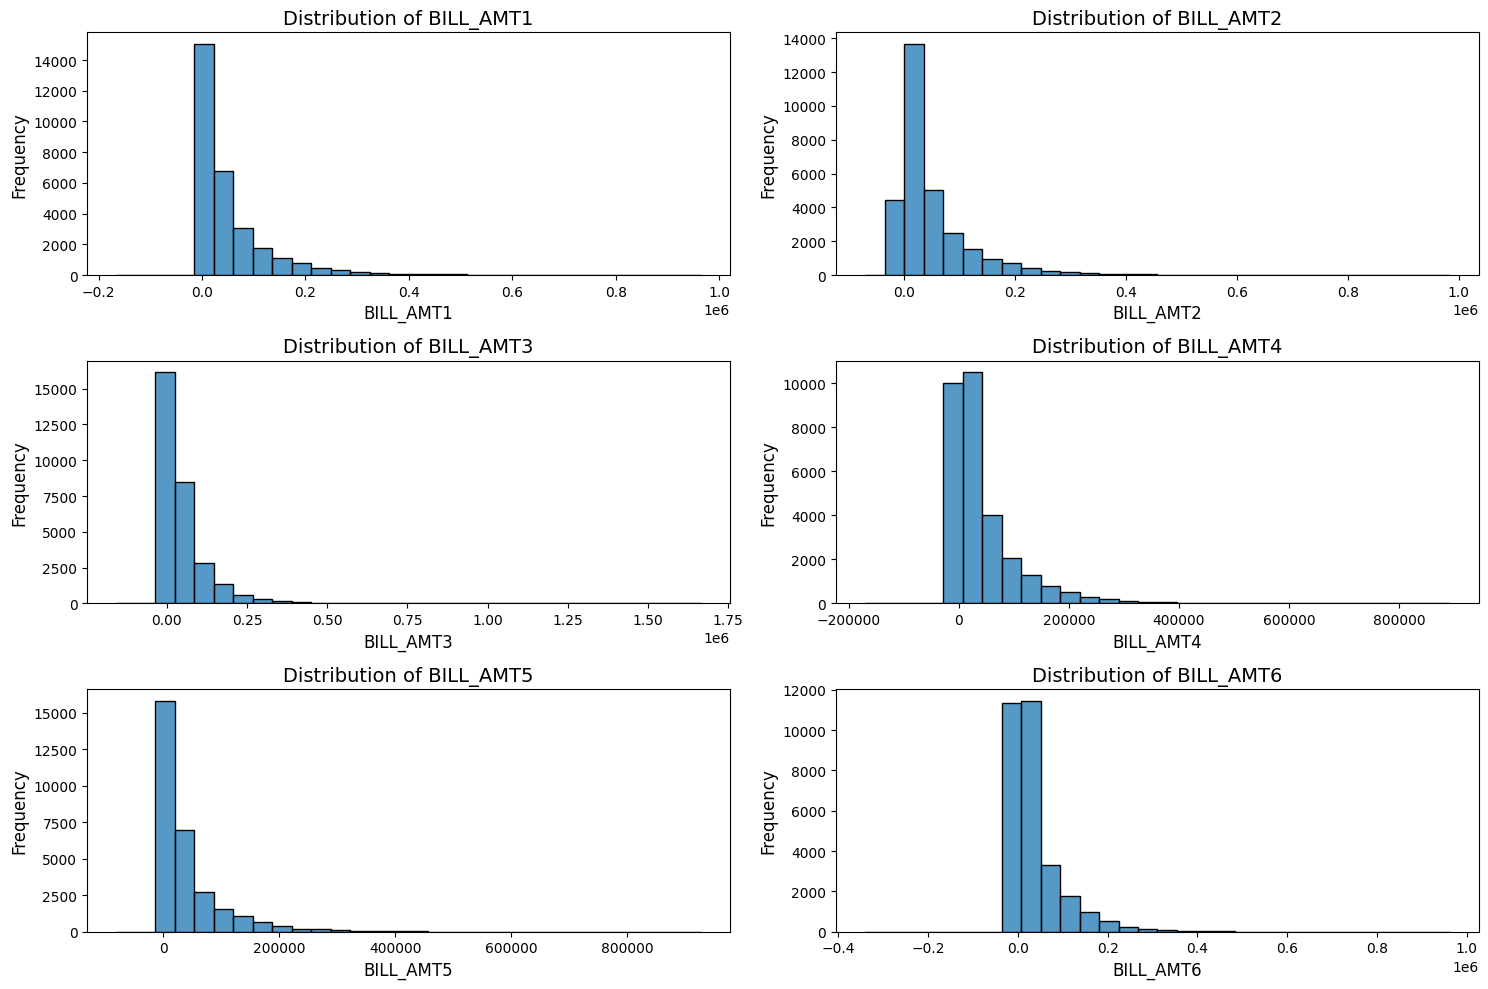

In [21]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(bill_amt):
    plt.subplot(3,2,i+1)
    sns.histplot(data =df, x= col,bins =30)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

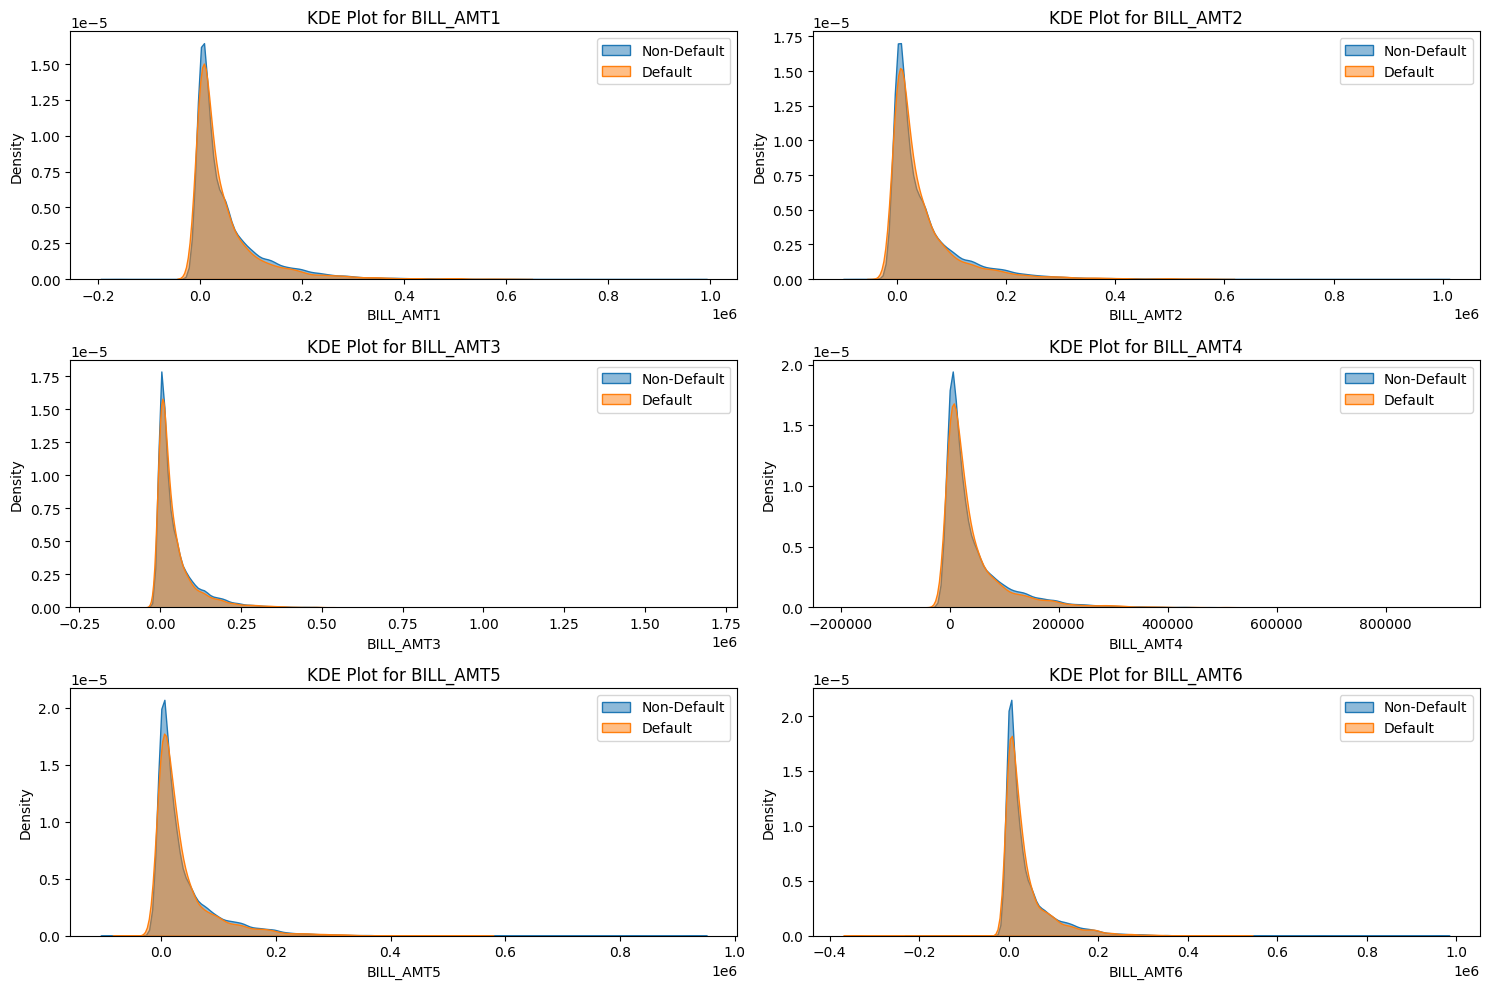

In [22]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(bill_amt):
    plt.subplot(3, 2, i + 1)
    sns.kdeplot(data=df[df['Y'] == 0], x=col, label='Non-Default', fill=True, alpha=0.5)
    sns.kdeplot(data=df[df['Y'] == 1], x=col, label='Default', fill=True, alpha=0.5)
    plt.title(f"KDE Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()

In [23]:
bins = [-350000, -1, 0, 25000, 75000, 200000, 2000000]

bill_bin_cols = ['BILL_AMT1_bins', 'BILL_AMT2_bins', 'BILL_AMT3_bins', 'BILL_AMT4_bins', 'BILL_AMT5_bins', 'BILL_AMT6_bins']

for i, col in enumerate(bill_amt):
    df[bill_bin_cols[i]] = pd.cut(df[col], bins=bins, labels =['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], include_lowest=True)


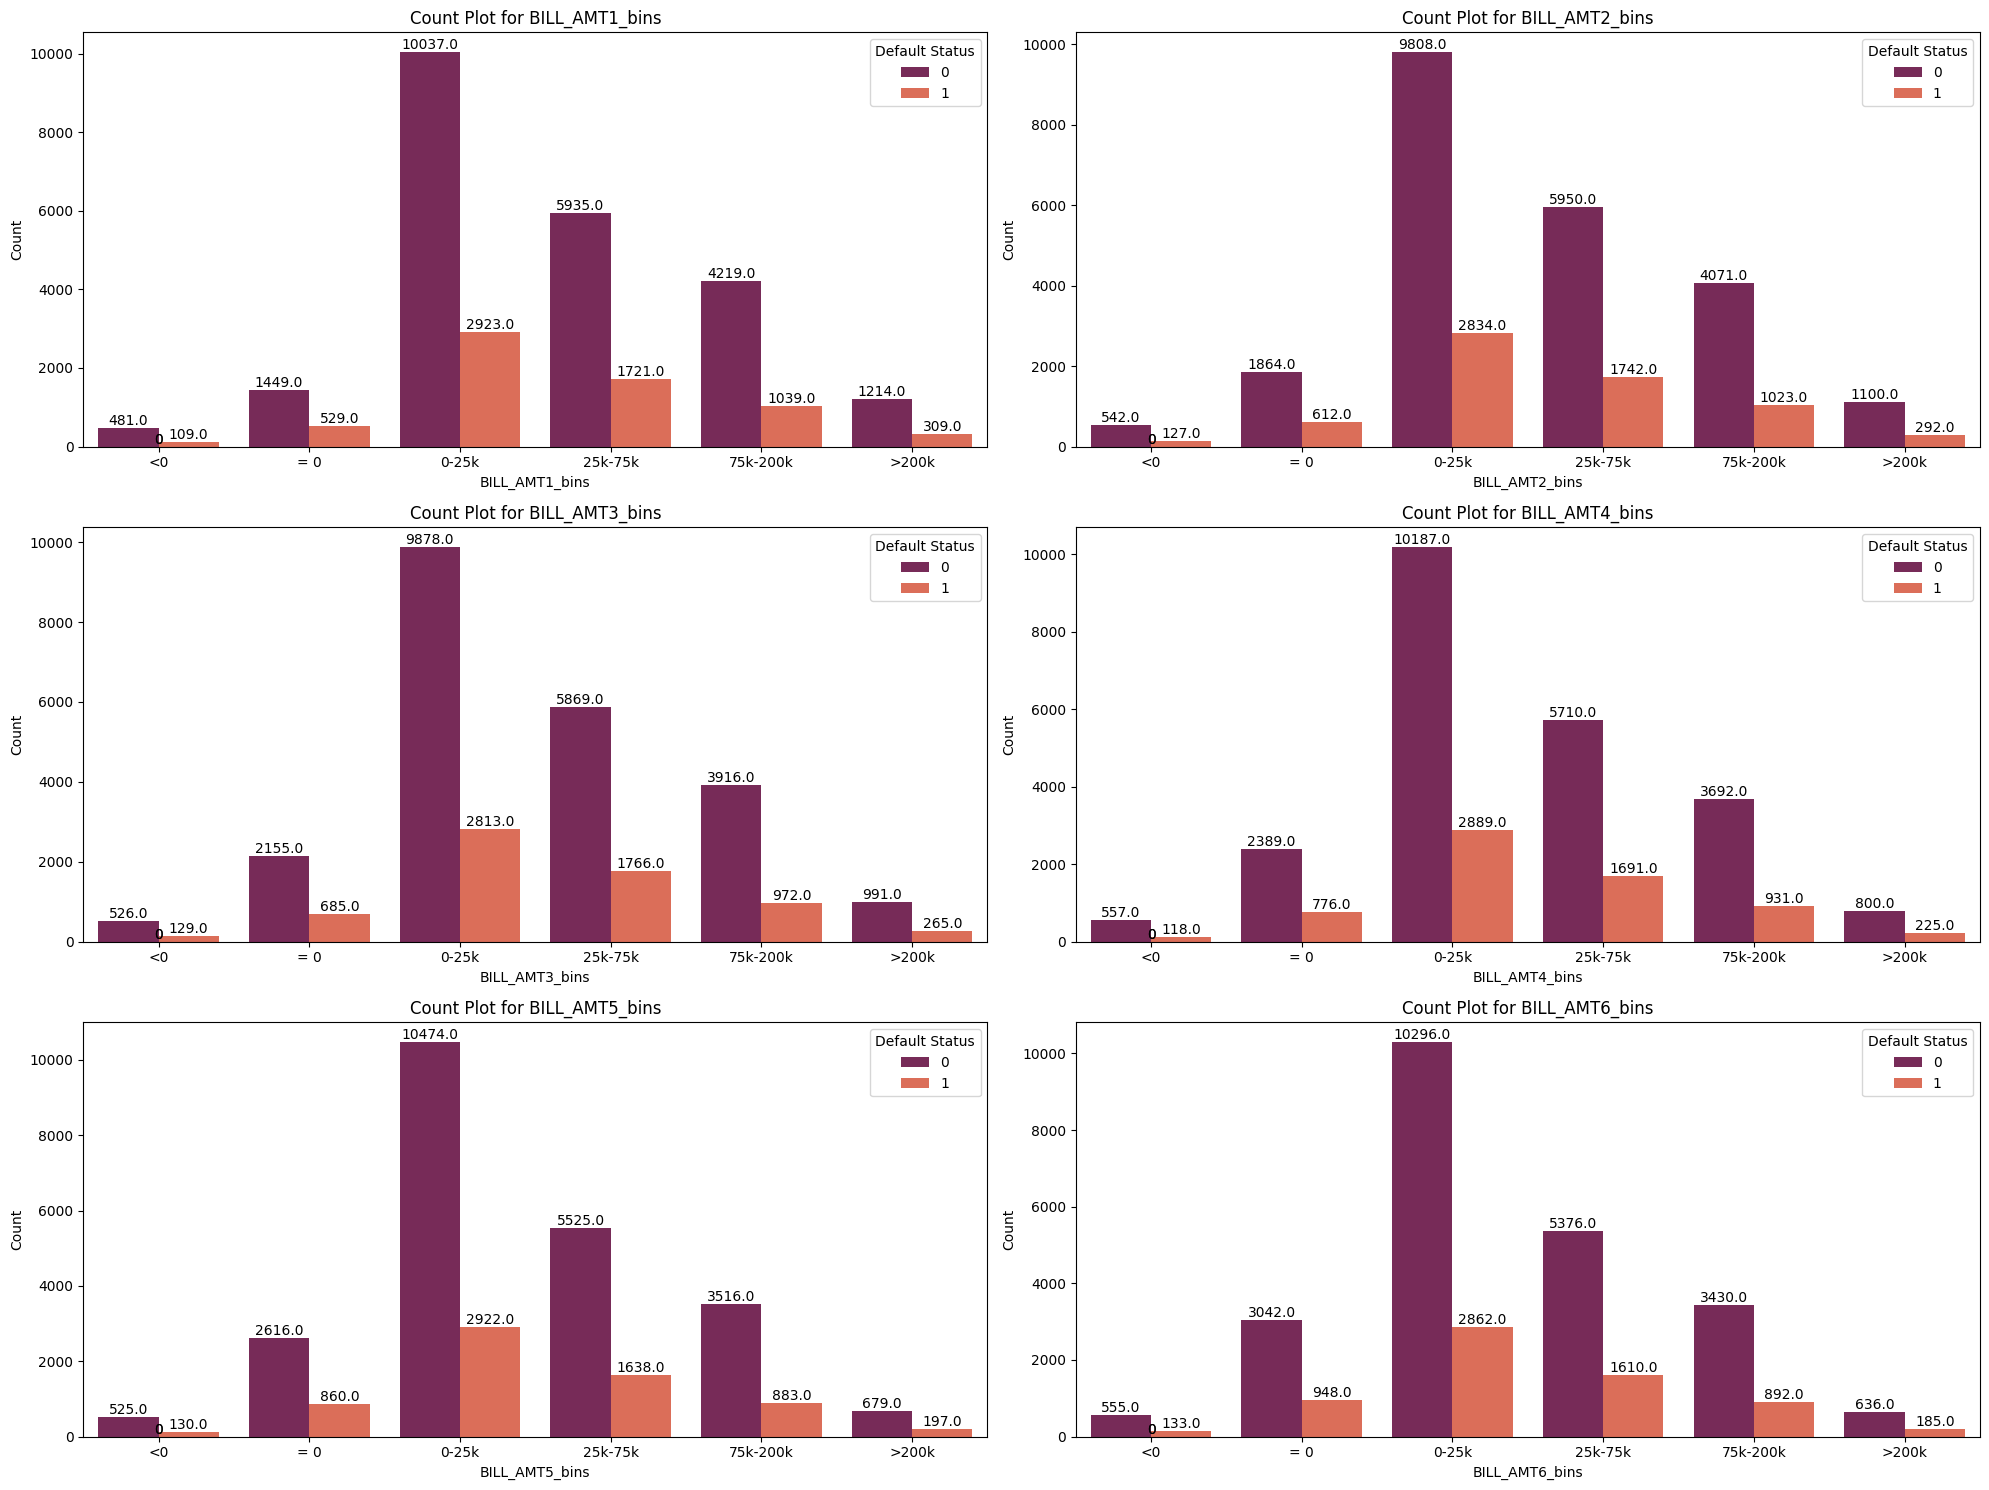

In [24]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(bill_bin_cols):
    plt.subplot(3,2,i+1)
    ax = sns.countplot(x=col, hue='Y', data=df, palette='rocket')
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
    plt.xticks([0,1,2,3,4,5], ['<0', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'])
    plt.ylabel("Count")
    plt.legend(title='Default Status', loc='upper right')
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')
plt.show()


---> Majority of bill statement is ~25K, for both default and non-default.

In [25]:
bill = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

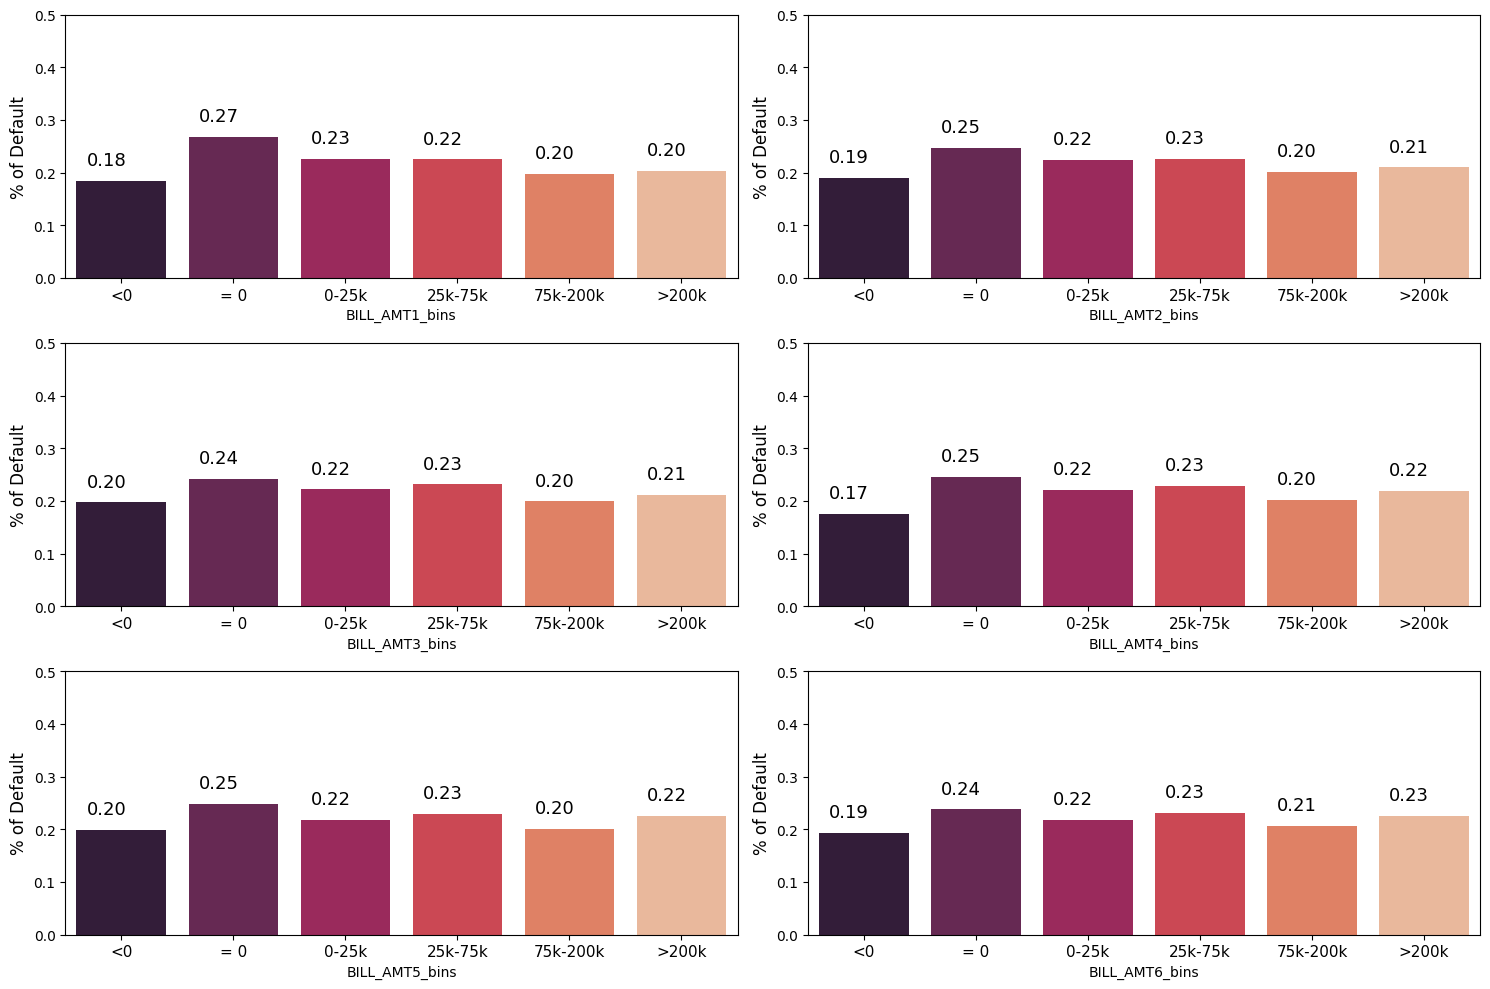

In [26]:
plt.figure(figsize=(15, 10))
for i,col in enumerate(bill_bin_cols):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "Y", data = df, hue = col, palette = 'rocket', errorbar = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.xticks([0,1,2,3,4,5],['<0', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize = 11)    
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.09, p.get_height()+0.03), fontsize=13)
plt.show()

---> After checking counts of defaults/non-defaults by bill amount, I checked the default % for each bill amount bin. Those who have negative balance (overpaid) are least likely to default. Interestingly, people who don't have balance on the bill has slightly higher default %.

#### 4. Pay amount.

In [27]:
pay_amt = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

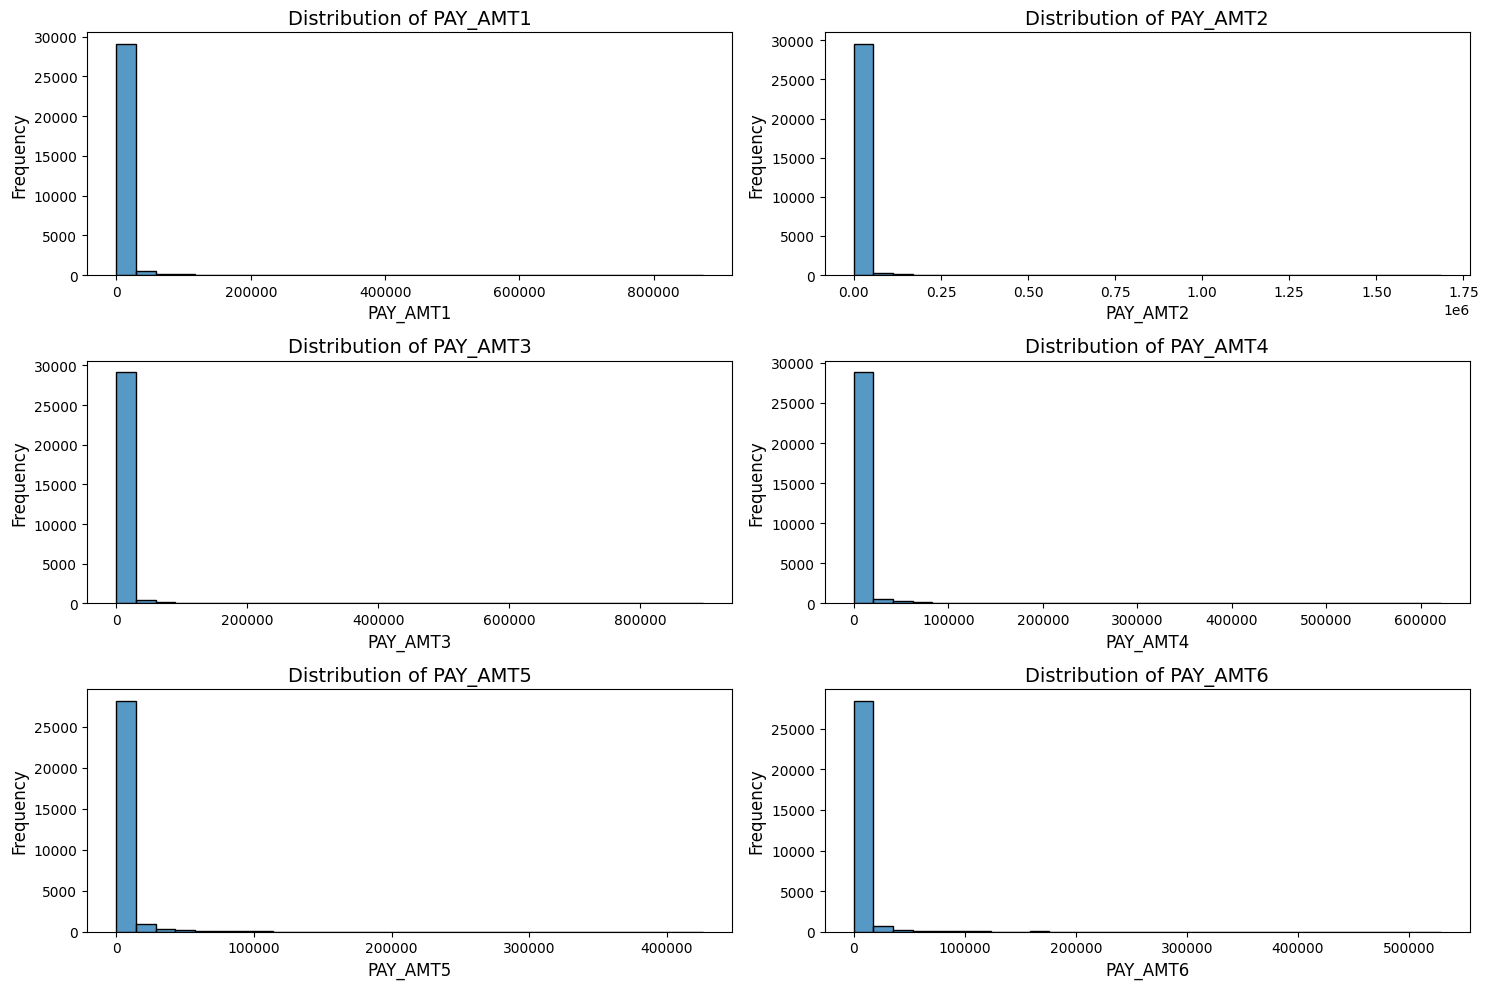

In [28]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(pay_amt):
    plt.subplot(3,2,i+1)
    sns.histplot(data =df, x= col,bins =30)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

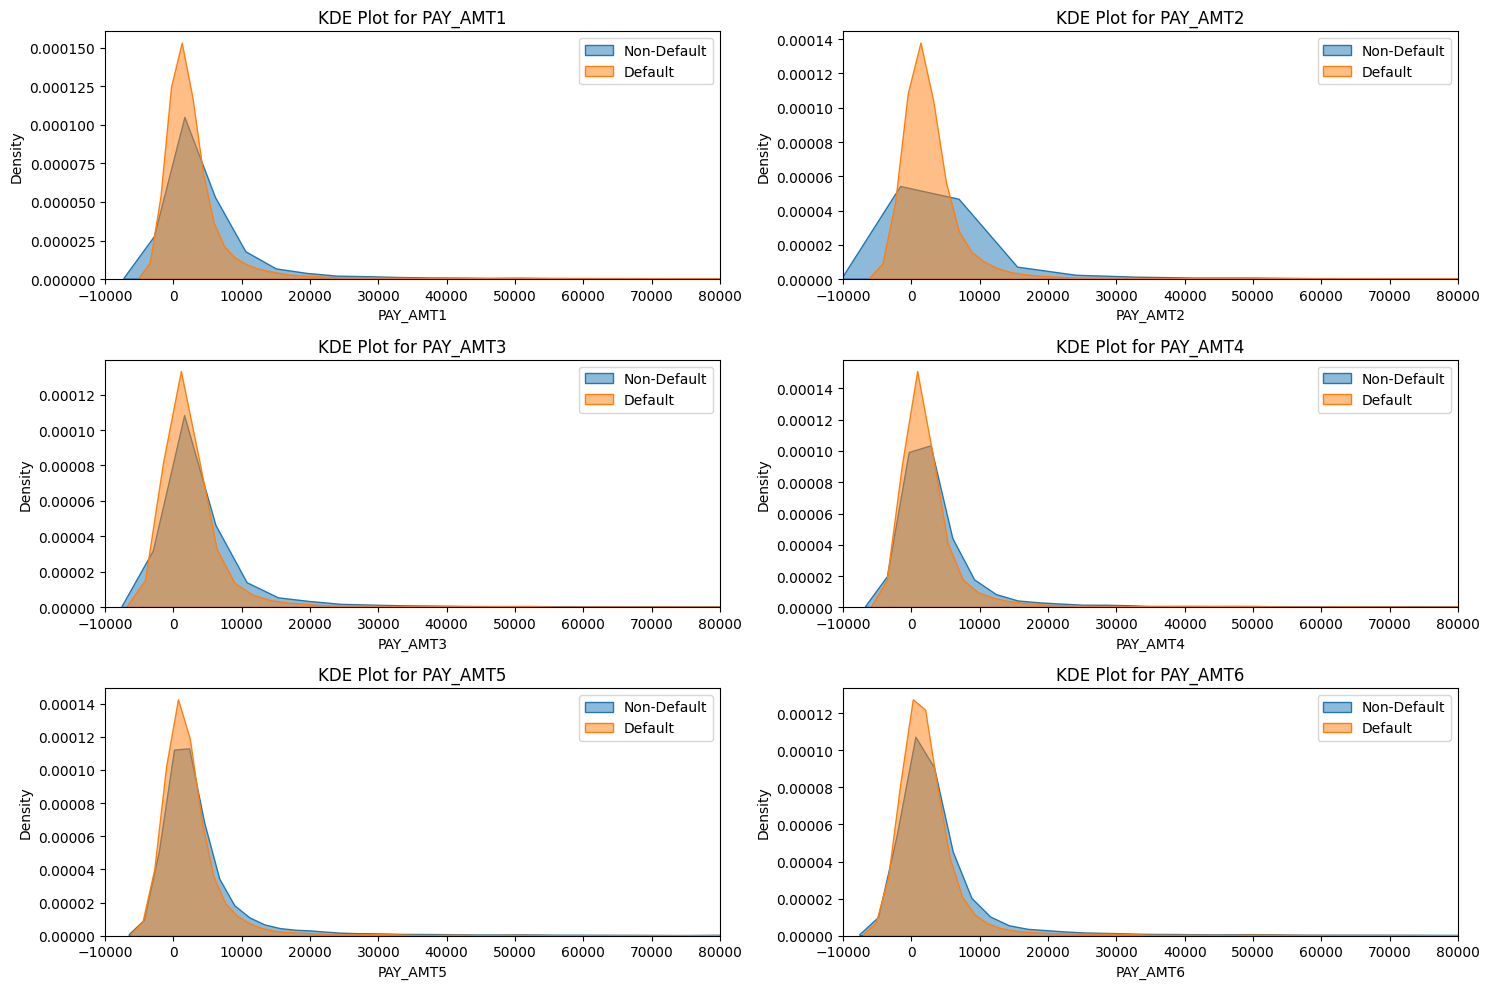

In [29]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(pay_amt):
    plt.subplot(3, 2, i + 1)
    sns.kdeplot(data=df[df['Y'] == 0], x=col, label='Non-Default', fill=True, alpha=0.5)
    sns.kdeplot(data=df[df['Y'] == 1], x=col, label='Default', fill=True, alpha=0.5)
    plt.title(f"KDE Plot for {col}")
    plt.xlabel(col)
    plt.xlim(-10000,80000)
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()

---> Overall, both defaulters/non-defaulters make small payments. However, more defaulters make smaller amount than non-defaulters. 

In [30]:
bins = [-1,0, 25000, 75000, 200000, 2000000]

pay_bin_cols = ['PAY_AMT1_bins', 'PAY_AMT2_bins', 'PAY_AMT3_bins', 'PAY_AMT4_bins', 'PAY_AMT5_bins', 'PAY_AMT6_bins']

for i, col in enumerate(pay_amt):
    df[pay_bin_cols[i]] = pd.cut(df[col], bins=bins, labels =['< 0','0-25k', '25k-75k', '75k-200k', '>200k'], include_lowest=True)


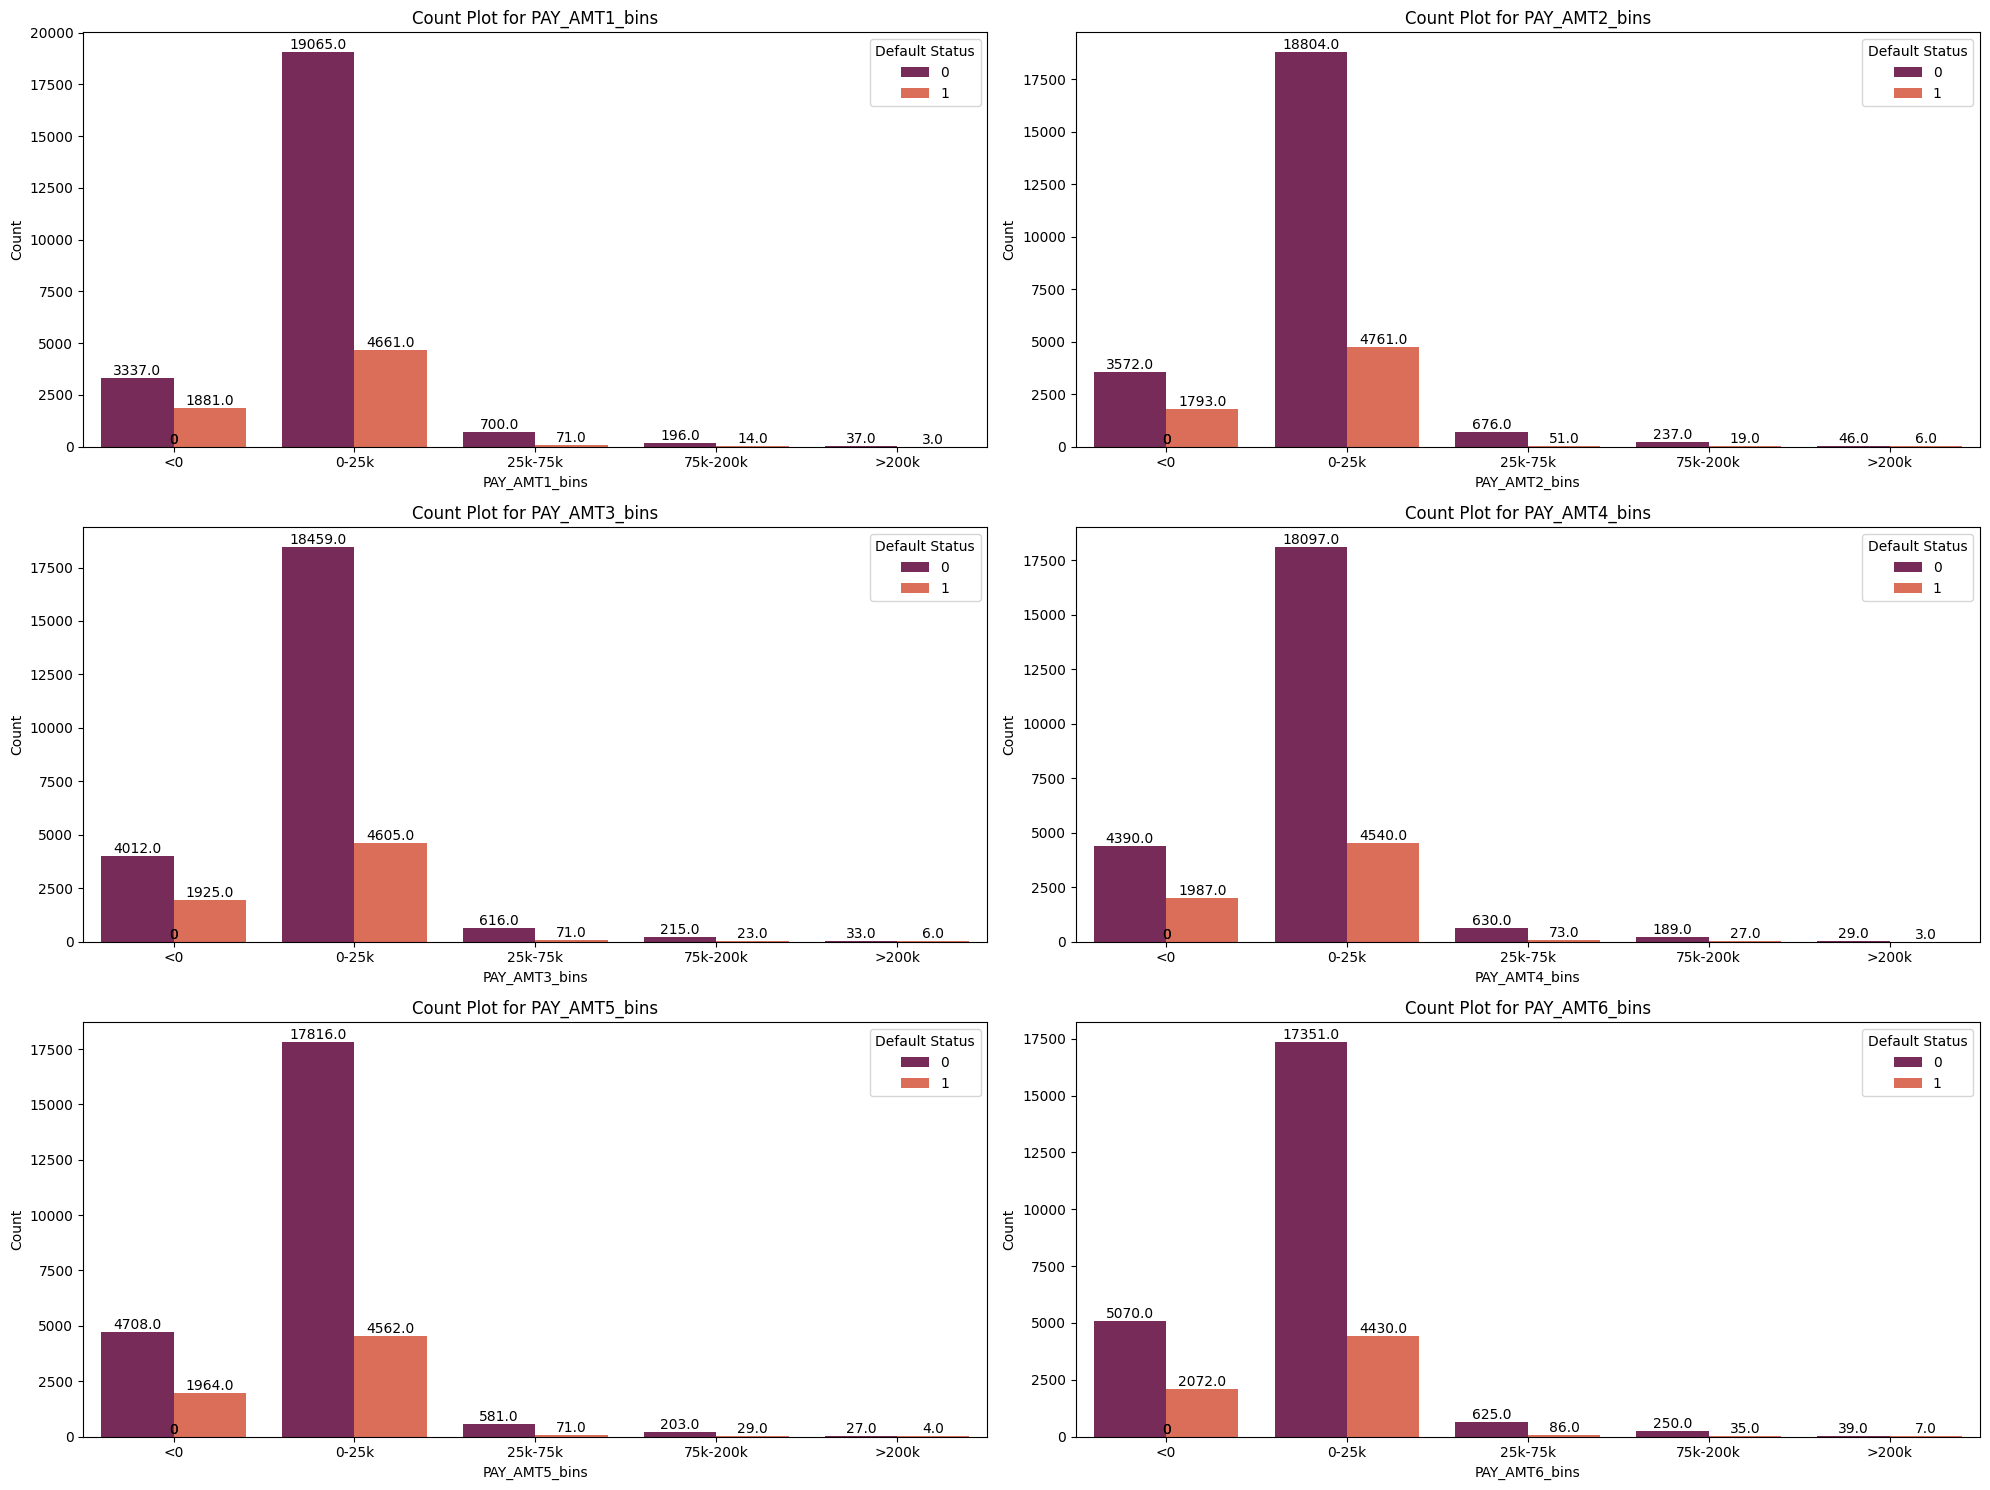

In [31]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(pay_bin_cols):
    plt.subplot(3,2,i+1)
    ax = sns.countplot(x=col, hue='Y', data=df, palette='rocket')
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
    plt.xticks([0,1,2,3,4], ['<0','0-25k', '25k-75k', '75k-200k', '>200k'])
    plt.ylabel("Count")
    plt.legend(title='Default Status', loc='upper right')
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')
plt.show()

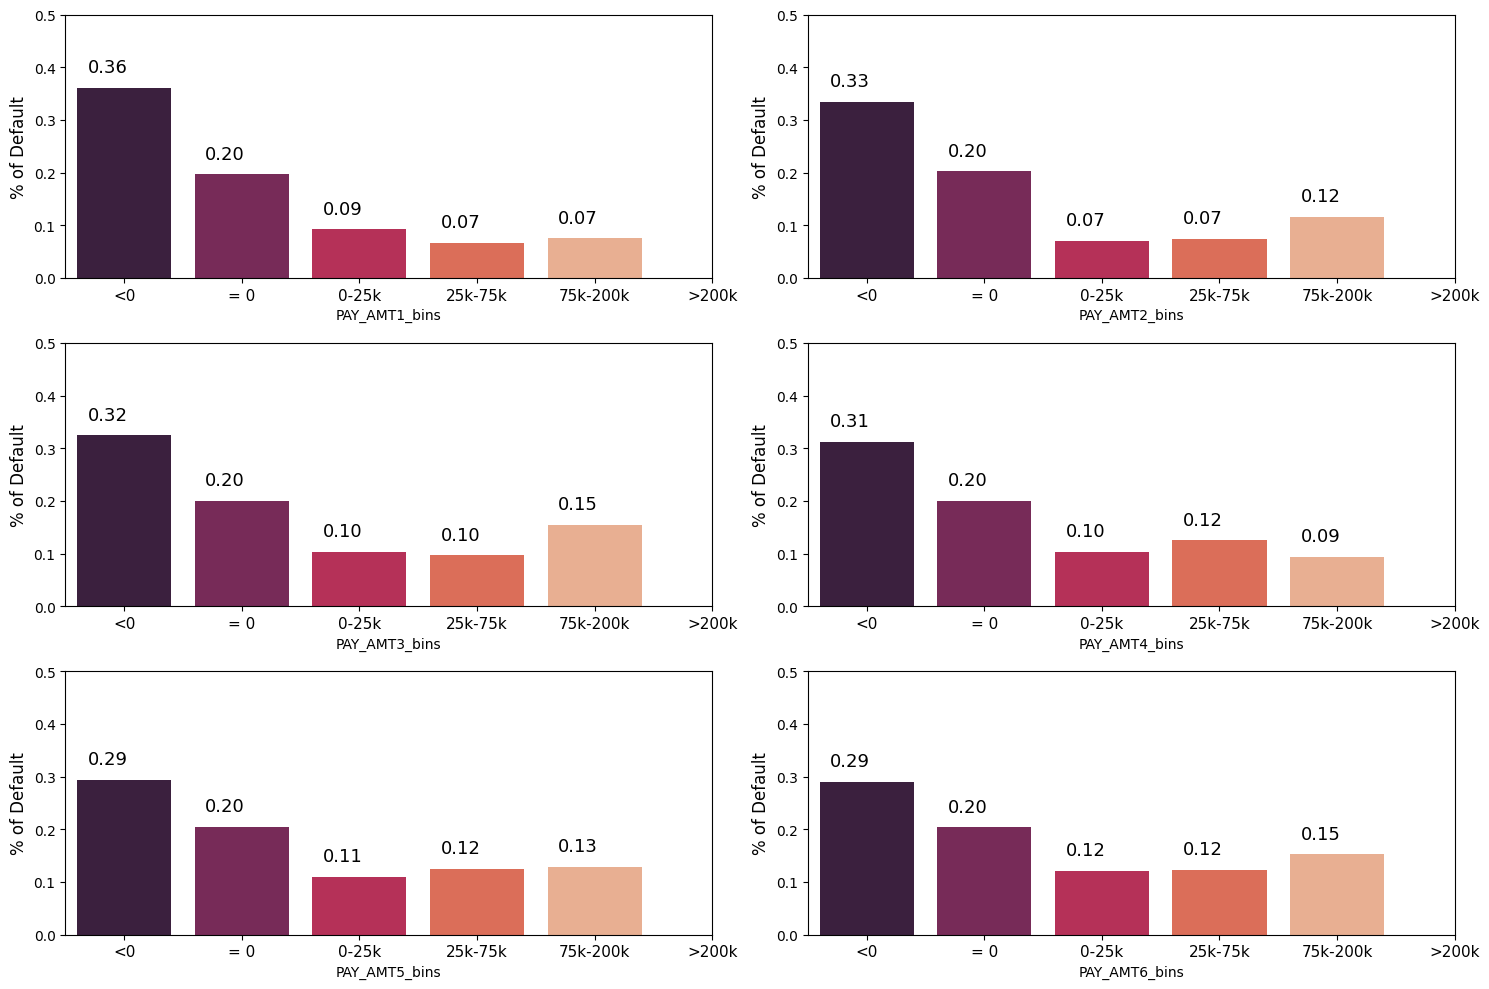

In [32]:
plt.figure(figsize=(15, 10))
for i,col in enumerate(pay_bin_cols):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "Y", data = df, hue = col, palette = 'rocket', errorbar = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.xticks([0,1,2,3,4,5],['<0', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize = 11)    
    plt.tight_layout()

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.09, p.get_height()+0.03), fontsize=13)
plt.show()

---> Those who paid nothing in the previous payment has higher default %. Those who pay ~25K have the least default %.

#### 5. Categorical variables.

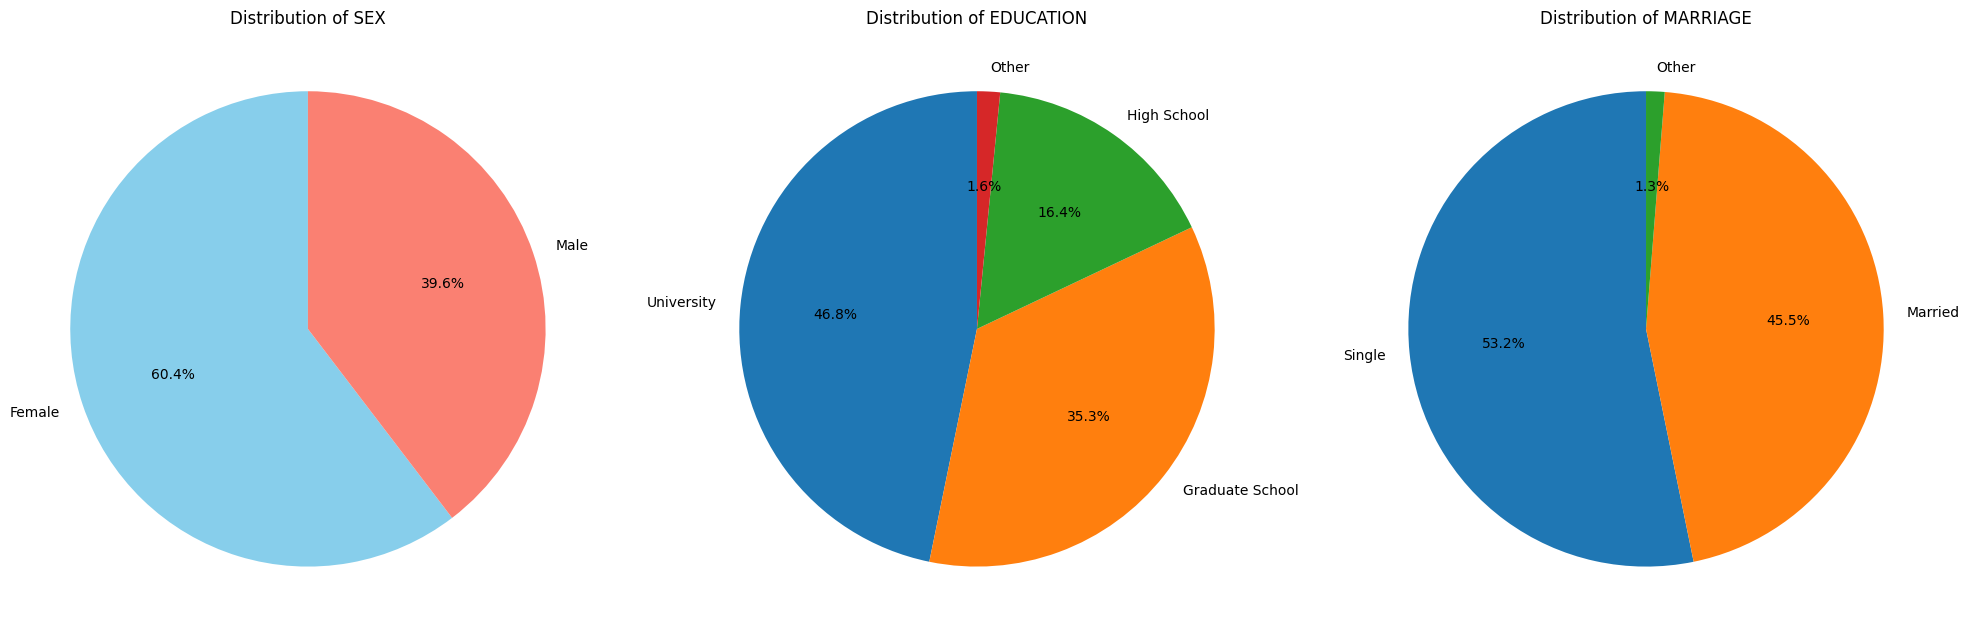

In [33]:
plt.figure(figsize=(20, 10))

# Pie chart for SEX
plt.subplot(1, 3, 1)
sex_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'], labels=['Female', 'Male'])
plt.title('Distribution of SEX')
plt.ylabel('')

# Pie chart for EDUCATION
plt.subplot(1, 3, 2)
education_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=['University', 'Graduate School', 'High School', 'Other'])
plt.title('Distribution of EDUCATION')
plt.ylabel('')

# Pie chart for MARRIAGE
plt.subplot(1, 3, 3)
marriage_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=['Single', 'Married', 'Other'])
plt.title('Distribution of MARRIAGE')
plt.ylabel('')

plt.tight_layout()
plt.show()

SEX: more women <br>
EDUCATION: mostly University or graduate school<br>
MARRIAGE: mostly single or married<br>

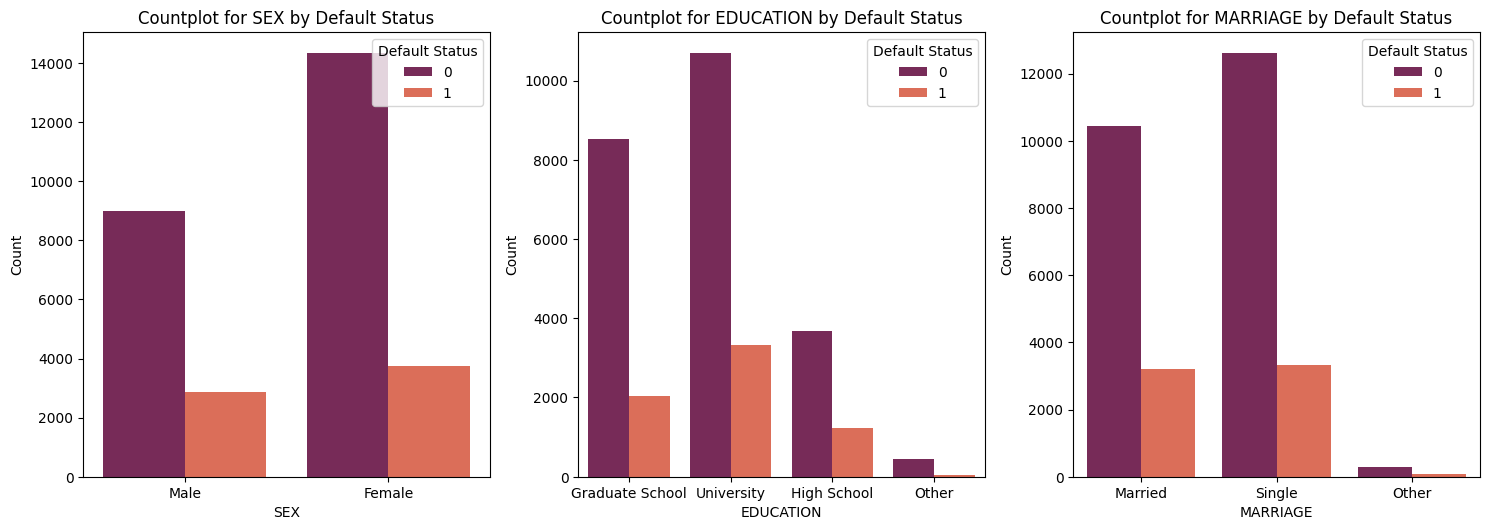

In [34]:
plt.figure(figsize=(15, 10))

# Countplot for SEX
plt.subplot(2, 3, 1)
sns.countplot(x='SEX', hue='Y', data=df, palette='rocket')
plt.title('Countplot for SEX by Default Status')
plt.xlabel('SEX')
plt.xticks([0, 1], ['Male', 'Female'])
plt.ylabel('Count')
plt.legend(title='Default Status', loc='upper right')

# Countplot for EDUCATION
plt.subplot(2, 3, 2)
sns.countplot(x='EDUCATION', hue='Y', data=df, palette='rocket')
plt.title('Countplot for EDUCATION by Default Status')
plt.xlabel('EDUCATION')
plt.xticks([0, 1, 2, 3], ['Graduate School', 'University', 'High School', 'Other'])
plt.ylabel('Count')
plt.legend(title='Default Status', loc='upper right')

# Countplot for MARRIAGE
plt.subplot(2, 3, 3)
sns.countplot(x='MARRIAGE', hue='Y', data=df, palette='rocket')
plt.title('Countplot for MARRIAGE by Default Status')
plt.xlabel('MARRIAGE')
plt.xticks([0, 1, 2], ['Married', 'Single', 'Other'])
plt.ylabel('Count')
plt.legend(title='Default Status', loc='upper right')

plt.tight_layout()
plt.show()

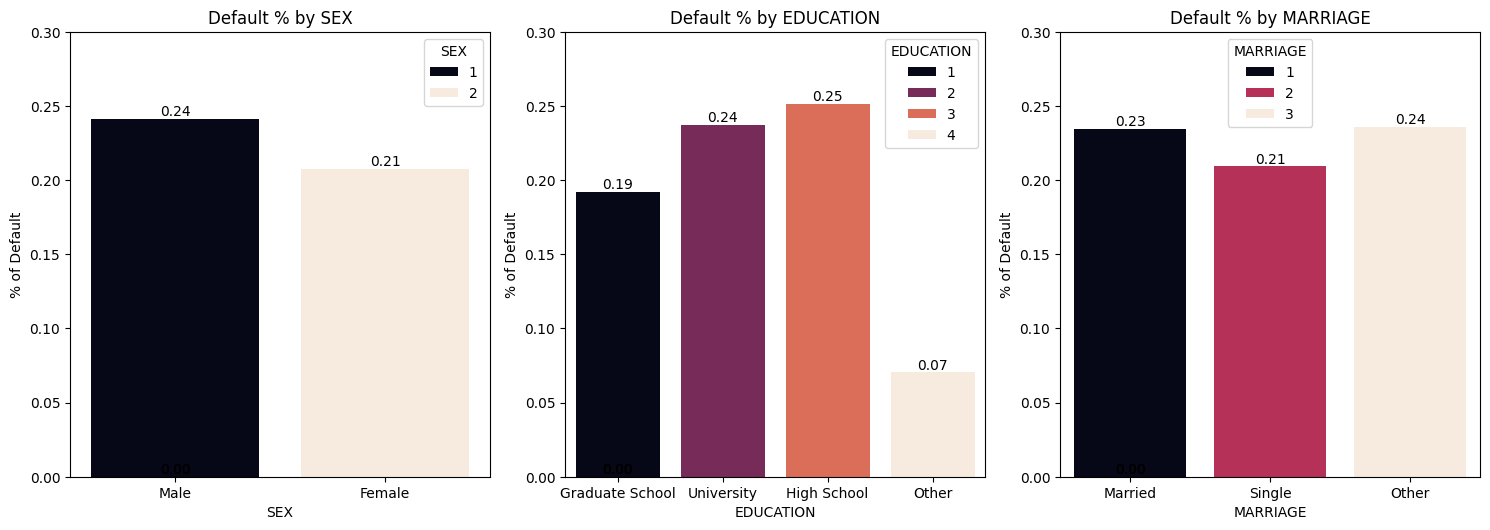

In [35]:
plt.figure(figsize=(15, 10))

# Barplot for SEX
plt.subplot(2, 3, 1)
ax = sns.barplot(x='SEX', y='Y', hue='SEX', data=df, palette='rocket', errorbar=None)
plt.title('Default % by SEX')
plt.xlabel('SEX')
plt.xticks([0, 1], ['Male', 'Female'])
plt.ylabel('% of Default')
plt.ylim(0, 0.3)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

# Barplot for EDUCATION
plt.subplot(2, 3, 2)
ax = sns.barplot(x='EDUCATION', y='Y', hue = 'EDUCATION', data=df, palette='rocket', errorbar=None)
plt.title('Default % by EDUCATION')
plt.xlabel('EDUCATION')
plt.xticks([0, 1, 2, 3], ['Graduate School', 'University', 'High School', 'Other'])
plt.ylabel('% of Default')
plt.ylim(0, 0.3)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

# Barplot for MARRIAGE
plt.subplot(2, 3, 3)
ax = sns.barplot(x='MARRIAGE', y='Y', hue ='MARRIAGE',data=df, palette='rocket', errorbar=None)
plt.title('Default % by MARRIAGE')
plt.xlabel('MARRIAGE')
plt.xticks([0, 1, 2], ['Married', 'Single', 'Other'])
plt.ylabel('% of Default')
plt.ylim(0, 0.3)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

SEX: default % is higher in males. <br>
EDUCATION: higher education, lower default %. <br>
MARRIAGE: default % is higher in married.

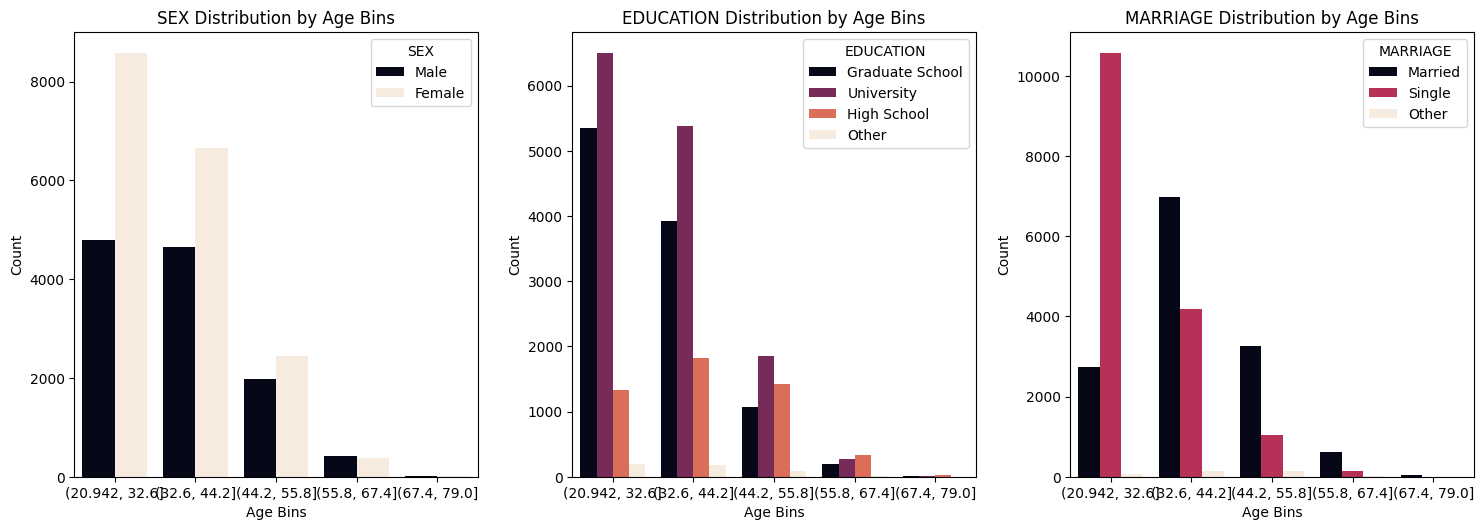

In [36]:
# Create age bins
df['AGE_bins'] = pd.cut(df['AGE'], bins=5)

# Plot grouped bar chart
plt.figure(figsize=(15, 10))

# Bar chart for SEX
plt.subplot(2, 3, 1)
sns.countplot(x='AGE_bins', hue='SEX', data=df, palette='rocket')
plt.title('SEX Distribution by Age Bins')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.legend(title='SEX', labels=['Male', 'Female'])

# Bar chart for EDUCATION
plt.subplot(2, 3, 2)
sns.countplot(x='AGE_bins', hue='EDUCATION', data=df, palette='rocket')
plt.title('EDUCATION Distribution by Age Bins')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.legend(title='EDUCATION', labels=['Graduate School', 'University', 'High School', 'Other'])

# Bar chart for MARRIAGE
plt.subplot(2, 3, 3)
sns.countplot(x='AGE_bins', hue='MARRIAGE', data=df, palette='rocket')
plt.title('MARRIAGE Distribution by Age Bins')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.legend(title='MARRIAGE', labels=['Married', 'Single', 'Other'])

plt.tight_layout()
plt.show()

---> In younger age card holders, there are more females than males. There are significantly more university & graduate degree holders in younger age groups. The younger the card holders are, more single than married.

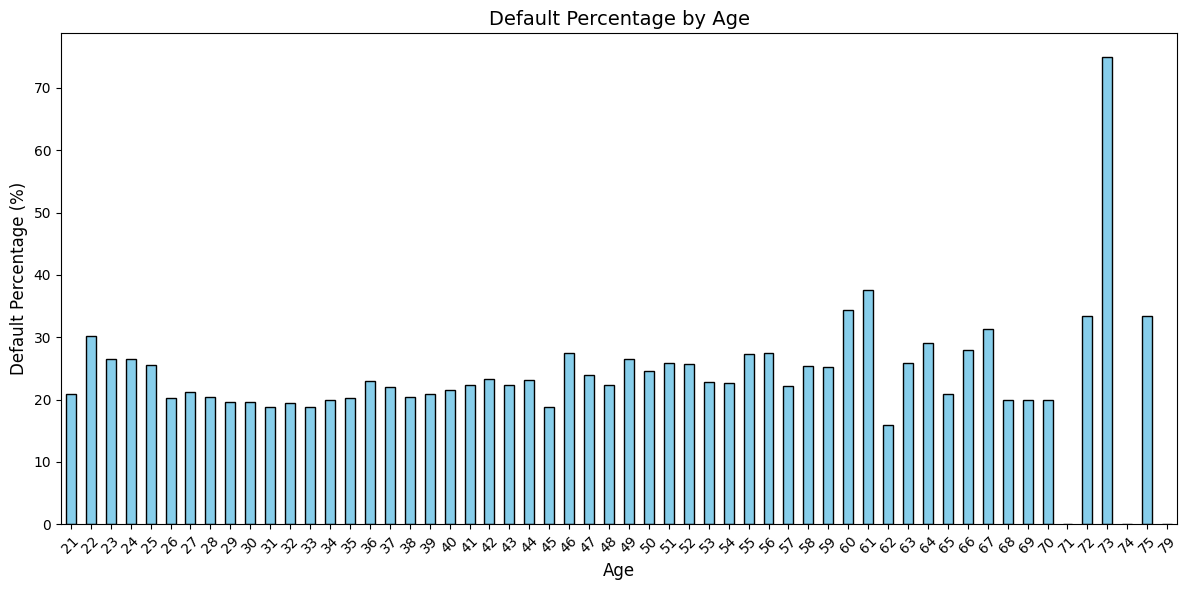

In [37]:
# Group by AGE and calculate default percentage
age_default_percentage = df.groupby('AGE')['Y'].mean() * 100

# Plot the default percentage by age
plt.figure(figsize=(12, 6))
age_default_percentage.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Default Percentage by Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Default Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




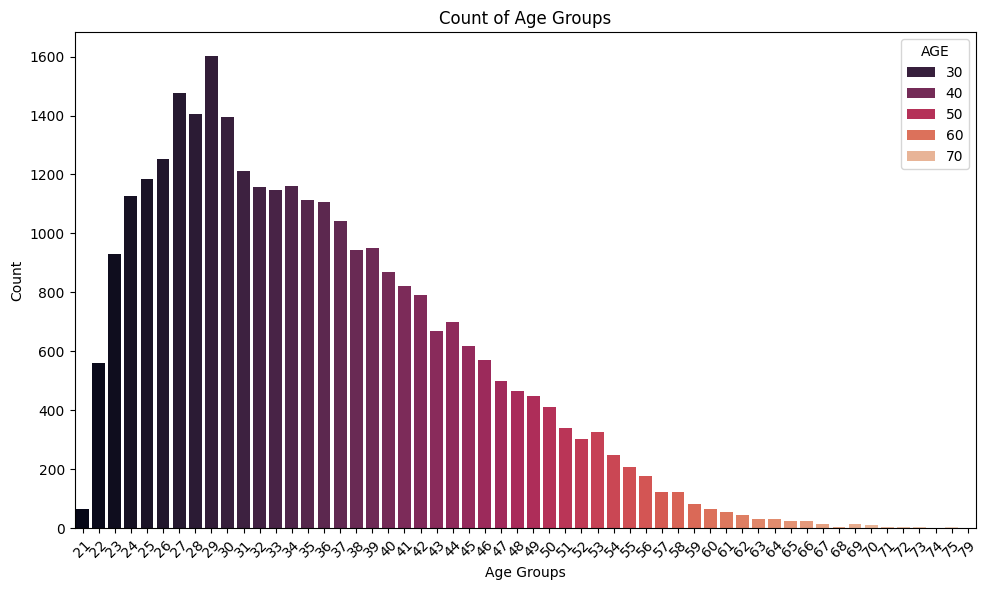

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='AGE', data=df, palette='rocket', hue = 'AGE')
plt.title('Count of Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---> There are significantly more population aged 20~30, but default % is lower than those who are in 40-50. People in 60s have higher default %, but the count is low.

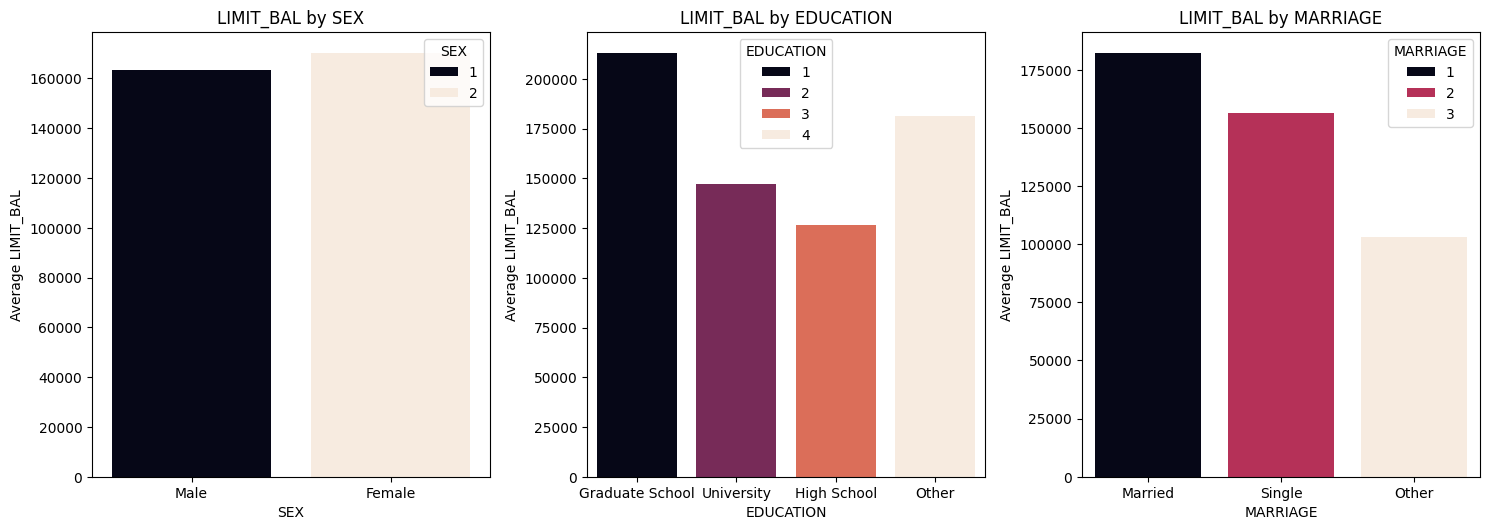

In [39]:
plt.figure(figsize=(15, 10))

# Bar chart for LIMIT_BAL by SEX
plt.subplot(2, 3, 1)
sns.barplot(x='SEX', y='LIMIT_BAL', data=df, palette='rocket', hue='SEX', errorbar=None)
plt.title('LIMIT_BAL by SEX')
plt.xlabel('SEX')
plt.xticks([0, 1], ['Male', 'Female'])
plt.ylabel('Average LIMIT_BAL')

# Bar chart for LIMIT_BAL by EDUCATION
plt.subplot(2, 3, 2)
sns.barplot(x='EDUCATION', y='LIMIT_BAL', data=df, palette='rocket',hue='EDUCATION', errorbar=None)
plt.title('LIMIT_BAL by EDUCATION')
plt.xlabel('EDUCATION')
plt.xticks([0, 1, 2, 3], ['Graduate School', 'University', 'High School', 'Other'])
plt.ylabel('Average LIMIT_BAL')

# Bar chart for LIMIT_BAL by MARRIAGE
plt.subplot(2, 3, 3)
sns.barplot(x='MARRIAGE', y='LIMIT_BAL', data=df, palette='rocket',hue='MARRIAGE',errorbar=None)
plt.title('LIMIT_BAL by MARRIAGE')
plt.xlabel('MARRIAGE')
plt.xticks([0, 1, 2], ['Married', 'Single', 'Other'])
plt.ylabel('Average LIMIT_BAL')

plt.tight_layout()
plt.show()

/tmp/ipykernel_3178/936585668.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  limit_bal_default_percentage = df.groupby('LIMIT_BAL_bins')['Y'].mean() * 100


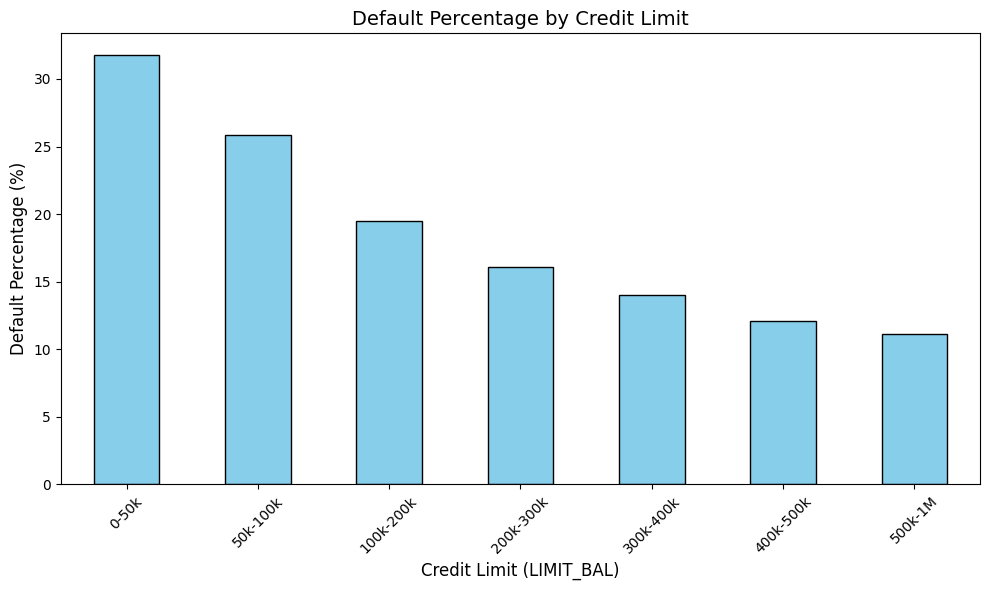

In [40]:
# Bin the LIMIT_BAL into categories
limit_bal_bins = [0, 50000, 100000, 200000, 300000, 400000, 500000, 1000000]
df['LIMIT_BAL_bins'] = pd.cut(df['LIMIT_BAL'], bins=limit_bal_bins, labels=['0-50k', '50k-100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '500k-1M'])

# Calculate default percentage for each bin
limit_bal_default_percentage = df.groupby('LIMIT_BAL_bins')['Y'].mean() * 100

# Plot the bar chart
plt.figure(figsize=(10, 6))
limit_bal_default_percentage.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Default Percentage by Credit Limit', fontsize=14)
plt.xlabel('Credit Limit (LIMIT_BAL)', fontsize=12)
plt.ylabel('Default Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---> Lower credit balance has higher default %.

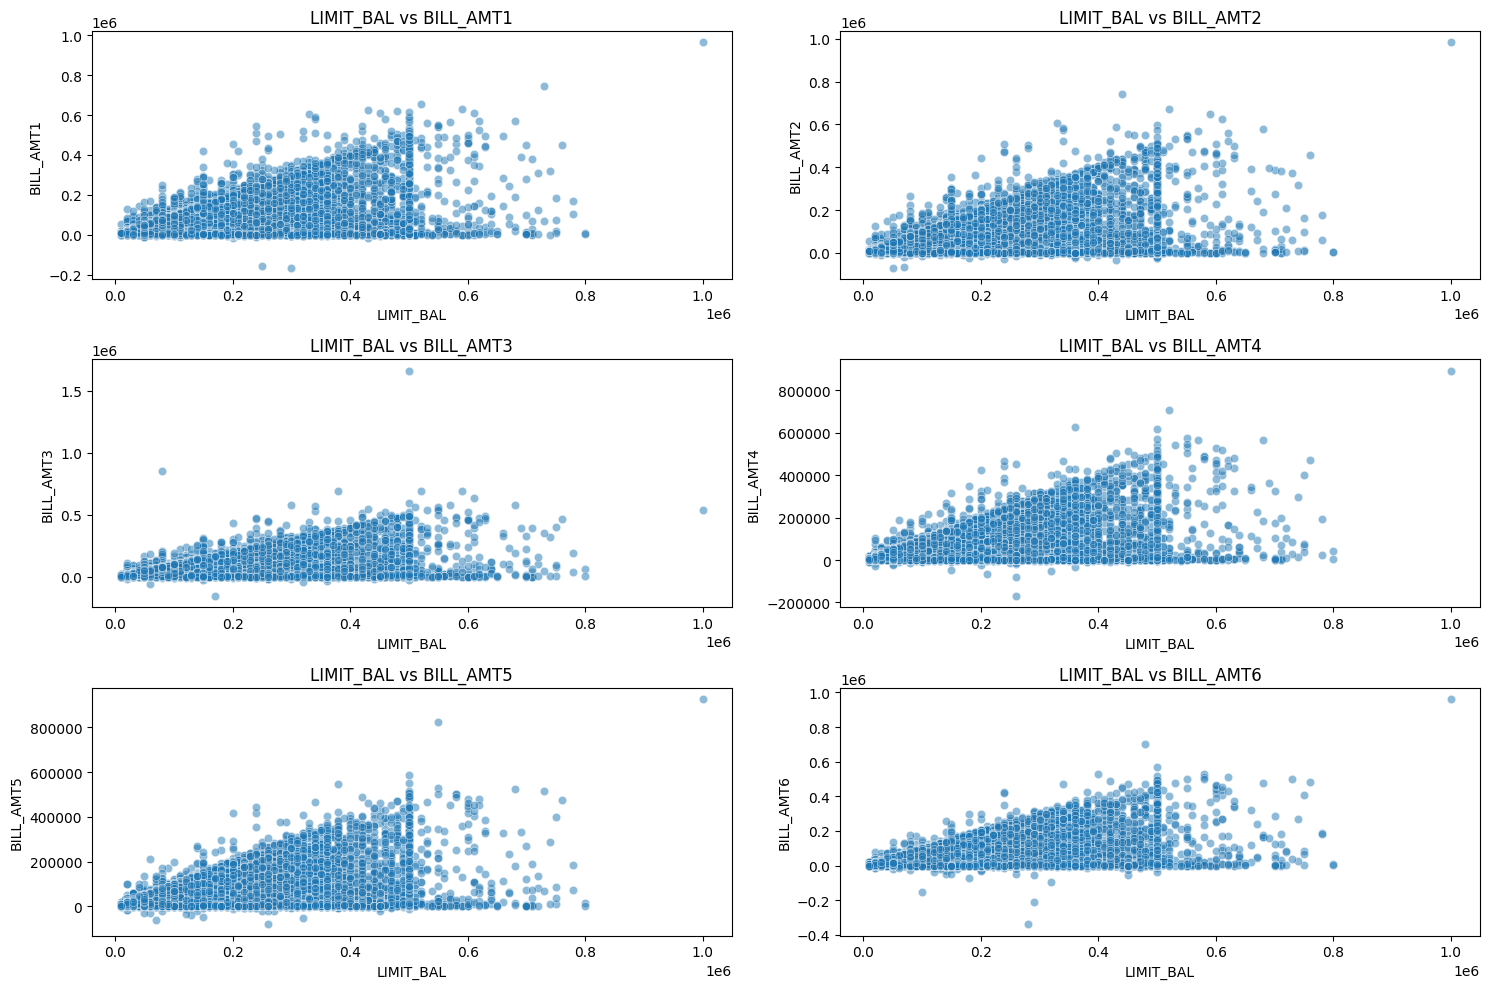

In [53]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(bill_amt):
    plt.subplot(3, 2, i + 1)
    sns.scatterplot(x='LIMIT_BAL', y=col, data=df, alpha=0.5)
    plt.title(f'LIMIT_BAL vs {col}')
    plt.xlabel('LIMIT_BAL')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

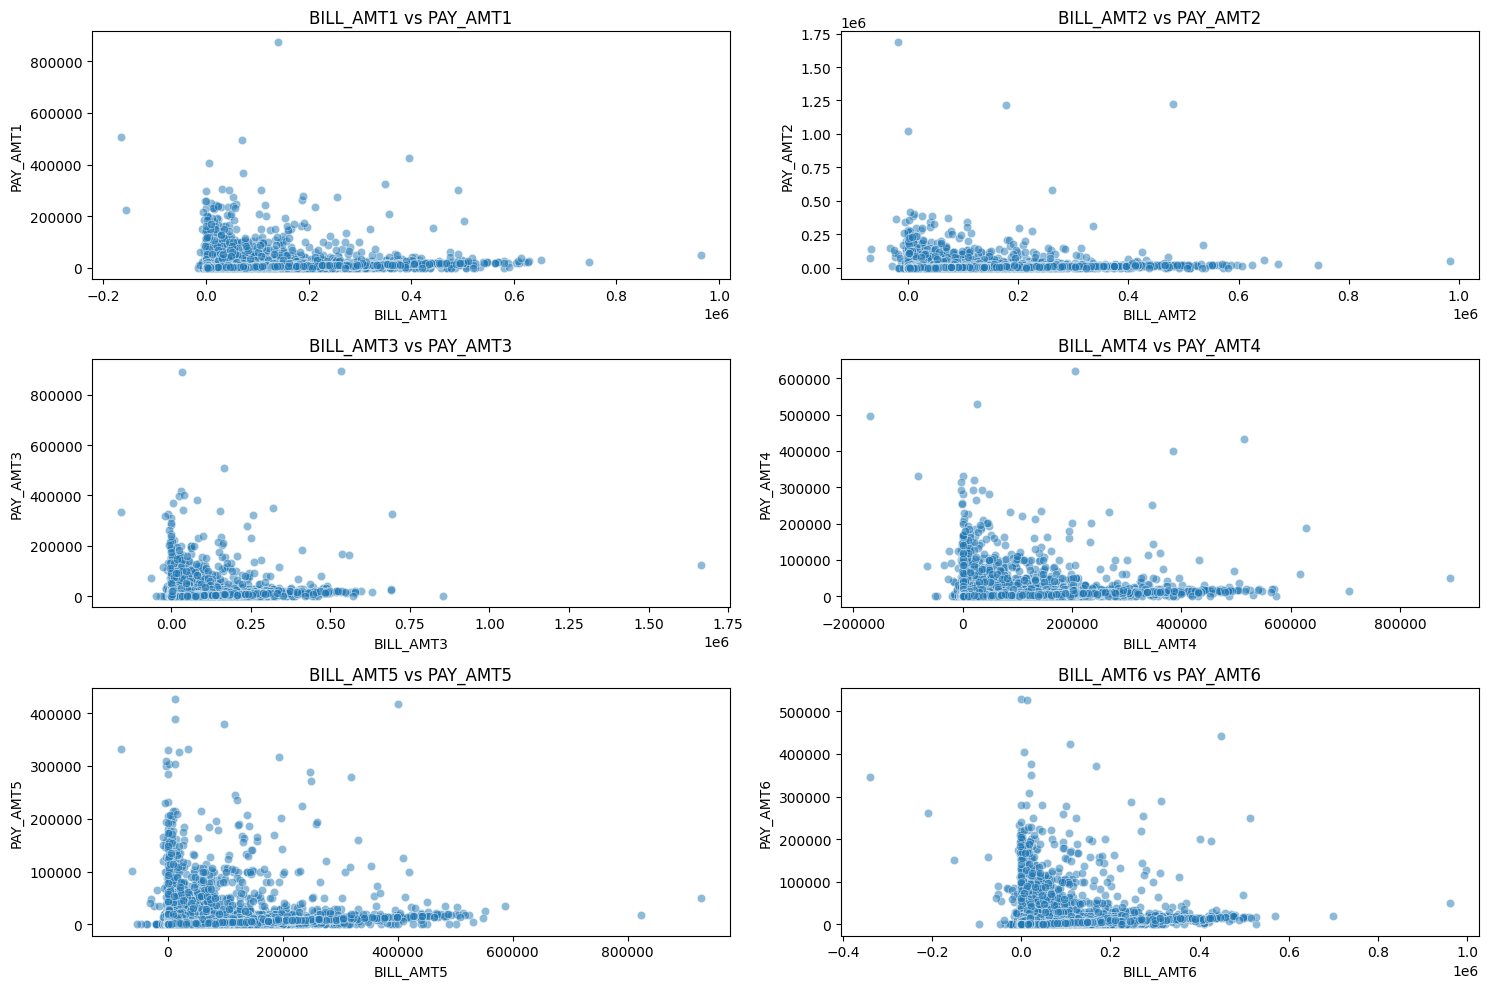

In [52]:
plt.figure(figsize=(15, 10))

# Scatterplot for BILL_AMT1 vs PAY_AMT1
plt.subplot(3, 2, 1)
sns.scatterplot(x='BILL_AMT1', y='PAY_AMT1', data=df, alpha=0.5)
plt.title('BILL_AMT1 vs PAY_AMT1')
plt.xlabel('BILL_AMT1')
plt.ylabel('PAY_AMT1')

# Scatterplot for BILL_AMT2 vs PAY_AMT2
plt.subplot(3, 2, 2)
sns.scatterplot(x='BILL_AMT2', y='PAY_AMT2', data=df, alpha=0.5)
plt.title('BILL_AMT2 vs PAY_AMT2')
plt.xlabel('BILL_AMT2')
plt.ylabel('PAY_AMT2')

# Scatterplot for BILL_AMT3 vs PAY_AMT3
plt.subplot(3, 2, 3)
sns.scatterplot(x='BILL_AMT3', y='PAY_AMT3', data=df, alpha=0.5)
plt.title('BILL_AMT3 vs PAY_AMT3')
plt.xlabel('BILL_AMT3')
plt.ylabel('PAY_AMT3')

# Scatterplot for BILL_AMT4 vs PAY_AMT4
plt.subplot(3, 2, 4)
sns.scatterplot(x='BILL_AMT4', y='PAY_AMT4', data=df, alpha=0.5)
plt.title('BILL_AMT4 vs PAY_AMT4')
plt.xlabel('BILL_AMT4')
plt.ylabel('PAY_AMT4')

# Scatterplot for BILL_AMT5 vs PAY_AMT5
plt.subplot(3, 2, 5)
sns.scatterplot(x='BILL_AMT5', y='PAY_AMT5', data=df, alpha=0.5)
plt.title('BILL_AMT5 vs PAY_AMT5')
plt.xlabel('BILL_AMT5')
plt.ylabel('PAY_AMT5')

# Scatterplot for BILL_AMT6 vs PAY_AMT6
plt.subplot(3, 2, 6)
sns.scatterplot(x='BILL_AMT6', y='PAY_AMT6', data=df, alpha=0.5)
plt.title('BILL_AMT6 vs PAY_AMT6')
plt.xlabel('BILL_AMT6')
plt.ylabel('PAY_AMT6')

plt.tight_layout()
plt.show()

/tmp/ipykernel_3178/1403977296.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='LIMIT_BAL_bins', y=col, data=df, palette='rocket', ci=None)
/tmp/ipykernel_3178/1403977296.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LIMIT_BAL_bins', y=col, data=df, palette='rocket', ci=None)
/tmp/ipykernel_3178/1403977296.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='LIMIT_BAL_bins', y=col, data=df, palette='rocket', ci=None)
/tmp/ipykernel_3178/1403977296.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LIMIT_BAL_bins', y=col, data=df, palette='rocket', c

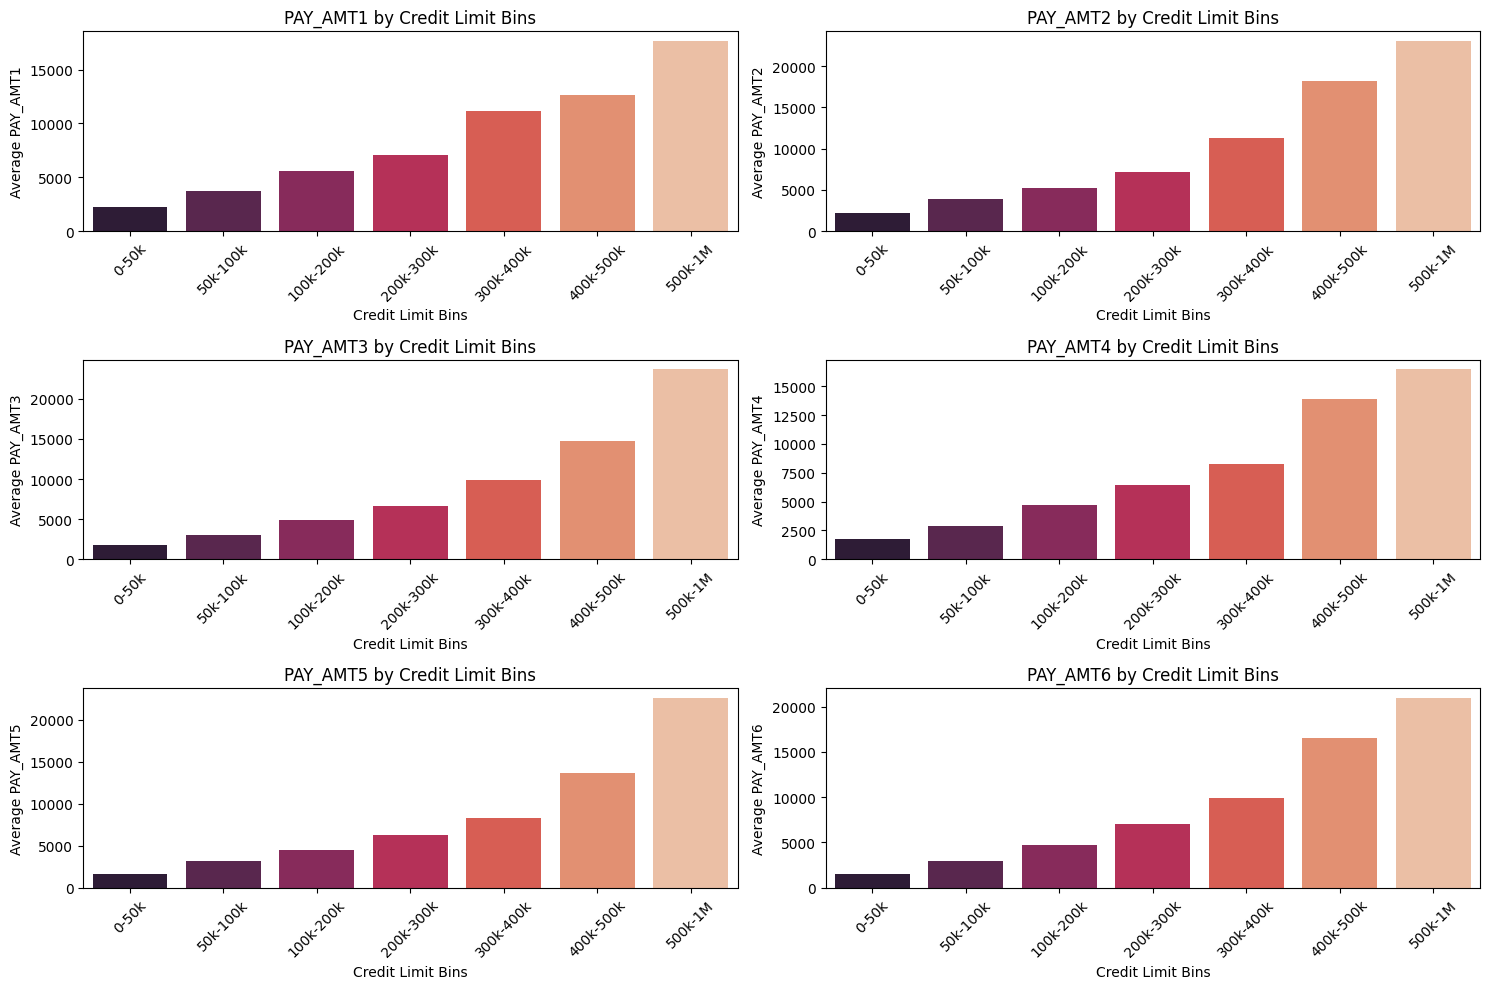

In [41]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(pay_amt):
    plt.subplot(3, 2, i + 1)
    sns.barplot(x='LIMIT_BAL_bins', y=col, data=df, palette='rocket', ci=None)
    plt.title(f'{col} by Credit Limit Bins')
    plt.xlabel('Credit Limit Bins')
    plt.ylabel(f'Average {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Correlation matrix

In [42]:
bill_amt = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

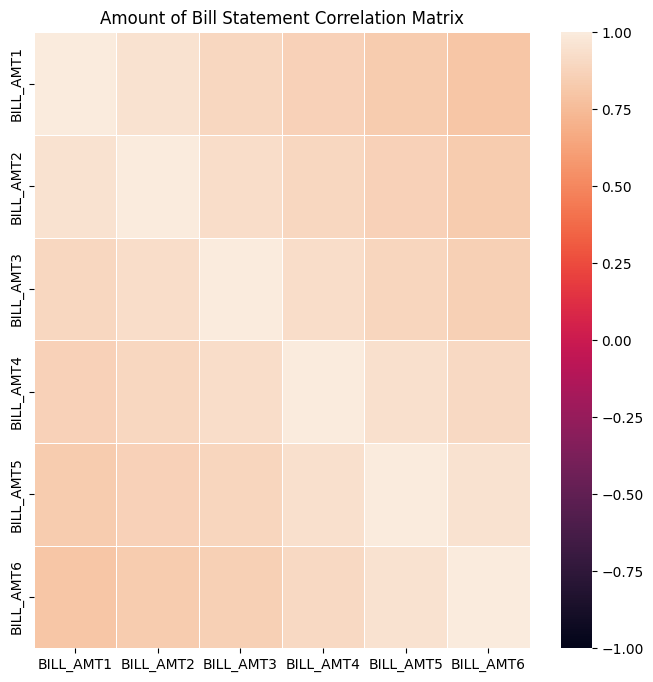

In [43]:
plt.figure(figsize = (8,8))
plt.title('Amount of Bill Statement Correlation Matrix')
corr = df[bill_amt].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.5,vmin=-1, vmax=1)
plt.show()

Bill statement amount correlation decreases as the distance between months increases.

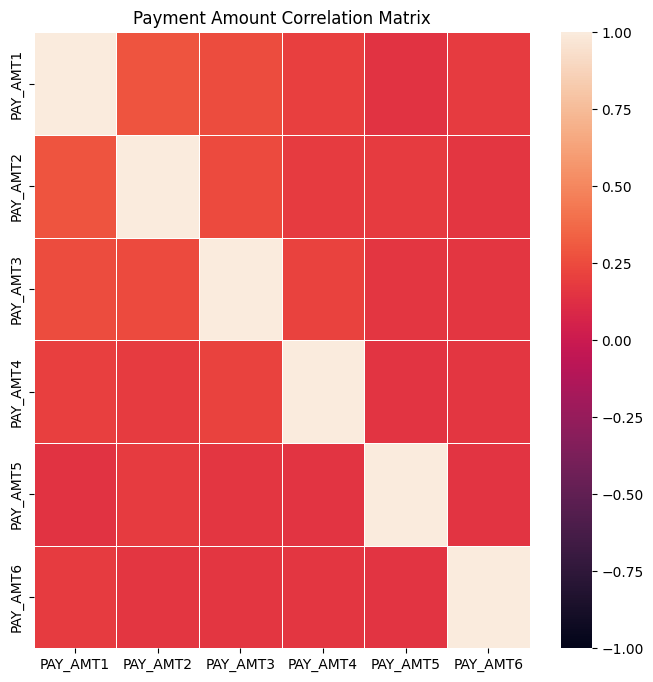

In [44]:
pay_amt = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize = (8,8))
plt.title("Payment Amount Correlation Matrix")
corr = df[pay_amt].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.5,vmin=-1,vmax=1)
plt.show()

Payment amount does not show much correlations.

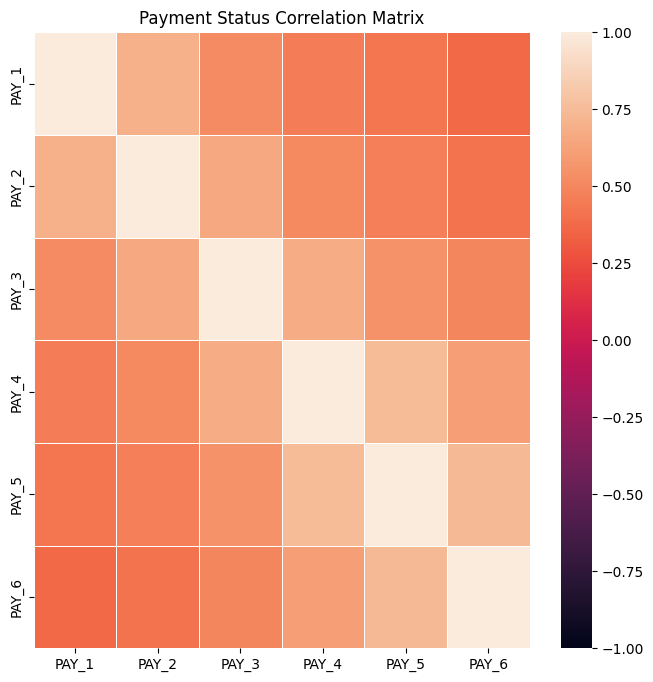

In [45]:
pay_status = ['PAY_1', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',]

plt.figure(figsize = (8,8))
plt.title("Payment Status Correlation Matrix")
corr = df[pay_status].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.5, vmax=1, vmin=-1)
plt.show()

Similar to bill statement correlation, the longer the distance between months, the lower correlation there exists. Consecutive months' status has higher correlations.

# Exporting cleaned dataset

In [54]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Y',
       'BILL_AMT1_bins', 'BILL_AMT2_bins', 'BILL_AMT3_bins', 'BILL_AMT4_bins',
       'BILL_AMT5_bins', 'BILL_AMT6_bins', 'PAY_AMT1_bins', 'PAY_AMT2_bins',
       'PAY_AMT3_bins', 'PAY_AMT4_bins', 'PAY_AMT5_bins', 'PAY_AMT6_bins',
       'AGE_bins', 'LIMIT_BAL_bins'],
      dtype='object')

In [55]:
df_clean = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Y']]

In [56]:
def corr_2_cols(Col1, Col2):
    res = df_clean.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]]+res[res.columns[1]]))
    return res

In [57]:
corr_2_cols('SEX', 'Y')

Y,0,1,perc
SEX,,,
1,9005,2869,0.241620
2,14330,3761,0.207893


In [58]:
df_clean.to_csv('df_clean.csv', index=False)